fuente: https://www.youtube.com/watch?v=W8AeOXa_FqU
Carlos Santana

#SOLO PYTHON SIN LIB DE IA

In [30]:
from    sklearn.datasets import make_circles
#@title datos de para entrenamiento
n = 10      # cantidad samples
p = 2       # entradas
X_coord, Y_class = make_circles(n_samples=n, factor=0.5, noise=0.05)

# Crear un arreglo unidimensional
#arreglo = [1, 2, 3, 4, 5]

# Agregar una dimensión al arreglo
Y_class = [[i] for i in Y_class]

#Y_class = Y_class[:, np.newaxis]      # agrega una dimension para pasar por multiplicaciones matriciales
Y_class, X_coord

([[0], [1], [0], [0], [0], [1], [1], [0], [1], [1]],
 array([[-0.74010021, -0.60678206],
        [-0.39229286, -0.22658647],
        [ 0.29520638,  0.96068651],
        [ 0.9899537 , -0.01326534],
        [ 0.30989375, -0.85310583],
        [ 0.55219516, -0.05135751],
        [ 0.25514616, -0.53564654],
        [-0.86023094,  0.6517034 ],
        [ 0.13636158,  0.46430552],
        [-0.37412441,  0.31705729]]))

In [1]:
#@title Producto Punto de dos Matrices
def mult_matricial(A, B):
  #S = []
  s = 0
  #C = [[0,0,0], [0,0,0], [0,0,0]]

  #Inicializa Matriz resultado
  fA, cB  = len(A), len(B[0])    # Filas A, Cols B
  C = [[None] * cB for i in range(fA)]

  #COL B x FIL A
  #print("A-> F:",len(A), "C:",len(A[0]))
  #print("B-> F:",len(B), "C:",len(B[0]))
  #print("\n")

  #fA  = len(A)
  #cB  = len(B[0])
  #D = [0] * 2 # len(B[0]) # *cB
  #C = [D] * 3 #len(A)   # fA
  #C = [[0]*2] * 3 #len(A)   # fA

  for cB in range(len(B[0])): #COL B
    for fA in range(len(A)): #FIL A
      s = 0
      for cA in range(len(A[0])): #COL A
        #for fB in range(cA, cA+1): #len(B)): #FIL B
          fB = cA
          #S.append(A[fA][cA] * B[fB][cB])
          s += A[fA][cA] * B[fB][cB]
          #print(f"A[{fA}, {cA}],  {A[fA][cA]}")
          #print(f"B[{fB}, {cB}],  {B[fB][cB]}")
          #print("\n")
      #S.append("+")
      C[fA][cB] = s

  return C

In [118]:
A = [[1,2], [3,4]]
B = [[5,6], [7,8]]

A = [[3,2,1], [1,1,3], [0,2,1]]
B = [[2,1], [1,0], [3,2]]

mult_matricial(A, B)

[[11, 5], [12, 7], [5, 2]]

In [20]:
#@title clase de una capa neuronal
import copy

class capa_neuronal():
  def __init__(self, n_entradas, n_neuronas, act_f, rango_W=2, rango_b=0.00001):
    self.n_entrada = n_entradas   # neuronas de entrada     cantidad
    self.n_salidas = n_neuronas   # neuronas de salida      cantidad
    #self.act_f = act_f            # funcion activacion puntero memoria
    self.func_activacion, self.deriv_activacion = act_f                 # funcion de activacion y su derivada
    #arr = np.full((M, N), 0.5)
    #arr_pos = np.full((n_entradas, math.ceil(n_neuronas/2)), 0.5)
    #arr_neg = np.full((n_entradas, n_neuronas//2), -0.5)
    #arr = np.hstack((arr_pos, arr_neg))
    #self.b = np.full((1, n_neuronas), 0.33) # * 2 -1             # una por cada neurona   ini aleatoria
    #self.W = np.hstack((arr_pos, arr_neg)) # * 2 -1    # una por cada entrada/neurona (conexion)   ini aleatoria

    #self.b = np.full((1, n_neuronas), 1) # * 2 -1             # una por cada neurona   ini aleatoria
    #self.W = np.full((n_entradas, n_neuronas), 1) # * 2 -1    # una por cada entrada/neurona (conexion)   ini aleatoria
    ##self.b = np.random.rand(1, n_neuronas) * rango_b - (rango_b//2)            # una por cada neurona   ini aleatoria
    ##self.W = np.random.rand(n_entradas, n_neuronas) * rango_W - (rango_W//2)    # una por cada entrada/neurona (conexion)   ini aleatoria
    self.b = crear_matricial_random(1, n_neuronas, rango_b*-1, rango_b)             # una por cada neurona   ini aleatoria
    self.W = crear_matricial_random(n_entradas, n_neuronas, rango_W*-1, rango_W)   # una por cada entrada/neurona (conexion)   ini aleatoria

    #self.b = np.random.rand(1, n_neuronas) * 2 -1             # una por cada neurona   ini aleatoria
    #self.W = np.random.rand(n_entradas, n_neuronas) * 2 -1    # una por cada entrada/neurona (conexion)   ini aleatoria
    self.W_ = []                  # peso anterior por cada Neurona/Entrada          W_ = W    respaldo
    self.b_ = []                  # peso anterior por cada Neurona/Entrada          b_ = b    respaldo

    self.W_i = []                  # peso anterior por cada Neurona/Entrada          W_ = W    respaldo
    self.b_i = []                  # peso anterior por cada Neurona/Entrada          b_ = b    respaldo

    self.X = []                   # in (valor entrada) por cada entrada
    self.neurona = []             # neurona por cada Neurona/Muestra                X * W + b
    self.activa = []              # activacion por cada Neurona/Muestra             eqiv  Y"
    self.dactiva = []             # derivada activacion por cada Neurona/Muestra
    self.loss = []                # loss por cada Muestra                           (Y" - Y) **2
    self.dloss = []               # derivada loss por cada Neurona/Muestra          ULTIMA CAPA: l2_cost[derv](a, Y)  o/o  CAPAS ANTERIORES: deltas[0] @  w_.T
    self.dloss_back = []          # derivada loss capa siguiente en backprop por cada Neurona/Muestra                   (Y" - Y) **2
    self.delta = []               # delta por cada Neurona/Muestra                  dloss * dactiv
    self.grad_W = []              # gradiente descendente por cada Neurona/Entrada  dactiv.T @ delta * lr       = out[l][actv].T @ deltas[0] * lr 
    self.grad_b = []              # gradiente descendente por cada Neurona          mdelta * lr                 = np.mean(deltas[0], axis=0, keepdims=True) * lr 

  #snapshot
  def snapshot(self):
    self.W_i = self.W.copy()
    self.b_i = self.b.copy()

  def rollback(self):
    self.W = self.W_i.copy()
    self.b = self.b_i.copy()

  def setWb(self, backup):
    self.W = backup.W.copy()
    self.b = backup.b.copy()

  def revert(self, backup):
    self = copy.deepcopy(backup)

  def restore(self, backup):
    self = copy.deepcopy(backup)

  def backup(self):
    return copy.deepcopy(self)

In [123]:
max(1,2)

2

In [95]:
#@title funciones de activacion

#sigm = lambda x: 1/(1 + np.e ** (-x))
func = 0  # pos 0 en arr
derv = 1  # pos 1 en arr

e= 2.718281828459045

# PARA ARREGLOS
#sigm = ( lambda M: list(map( lambda x: 1/(1 + e ** (-x)),  M)) , 
#         lambda M: list(map( lambda x: x * (1-x), M))         )

# PARA MATRICES
sigm = ( lambda M: list(map(lambda sublista: [1/(1 + e ** (-x)) for x in sublista], M)) , 
         lambda M: list(map(lambda sublista: [x * (1-x) for x in sublista], M))         )  

relu = (lambda x: max(0, x), 
        lambda x: 0 if x <= 0 else 1)

#sigm[0](1)

#_x = np.linspace(-5, 5, 100)
#plt.plot(_x, sigm[0](_x))
#plt.plot(_x, relu[0](_x))

In [111]:
#@title funcion de costo
#l2_cost = (lambda Yp, Yr: 0.5*((Yp - Yr) ** 2),
#          lambda Yp, Yr: (Yp - Yr))

# PARA ARREGLOS
#l2_cost = ( lambda M: list(map( lambda Yp, Yr: 0.5*((Yp - Yr) ** 2),  M)) , 
#         lambda M: list(map( lambda  Yp, Yr: (Yp - Yr), M))         )

l2_cost = ( lambda M, N: list(map(lambda Xp, Yr: [0.5*((Yp - Yr[0]) ** 2) for Yp in Xp], M, N)) , 
            lambda M, N: list(map(lambda Xp, Yr: [(Yp - Yr[0]) for Yp in Xp], M, N))         )  

#l2_cost = ( lambda M, N: list(map(lambda sublista: [0.5*((Yp - Yr) ** 2) for Yp, Yr in sublista], M, N)) , 
#            lambda M, N: list(map(lambda sublista: [(Yp - Yr) for Yp, Yr in sublista], M, N))         )  

# func_costo, deriv_costo = l2_cost


In [6]:
def media_matricial(M):
  #array = [[1,2,3], [4,5,6], [7,8,9]]
  num_filas = len(M)
  num_columnas = len(M[0])
  medias_columnas = []

  for j in range(num_columnas):
      columna_j = [M[i][j] for i in range(num_filas)]
      media_j = sum(columna_j) / num_filas
      medias_columnas.append(media_j)

  return [medias_columnas]

In [380]:
M = np.array([[1,2,3], [4,5,6], [7,8,9]])
media_matricial(D)

[[0.019459948999999997]]

In [379]:
D = np.array([[ 0.14578044],
        [-0.10407878],
        [-0.09729074],
        [ 0.13937786],
        [ 0.13929187],
        [ 0.14557496],
        [ 0.13473677],
        [-0.10784195],
        [-0.09675782],
        [-0.10419312]])

In [252]:
l2_cost[1](0.68606009, 1)

-0.31393991

In [275]:
N = np.array([[0.47575764],
        [0.29936586],
        [0.38864312],
        [0.27379999],
        [0.2717197 ],
        [0.46654041],
        [0.17224139],
        [0.24893647],
        [0.39559254],
        [0.29784572]])

In [278]:
act = 0.78176363
sigm[0](N), sigm[1](A)

(array([[0.6167456 ],
        [0.57428749],
        [0.59595602],
        [0.56802556],
        [0.56751504],
        [0.61456459],
        [0.54295421],
        [0.56191471],
        [0.59762826],
        [0.5739158 ]]), array([[0.23637046],
        [0.24448137],
        [0.24079244],
        [0.24537252],
        [0.24544172],
        [0.23687495],
        [0.24815494],
        [0.24616657],
        [0.24046872],
        [0.24453645]]))

In [272]:
A = np.array([[0.6167456 ],
        [0.57428749],
        [0.59595601],
        [0.56802556],
        [0.56751504],
        [0.61456459],
        [0.54295421],
        [0.56191471],
        [0.59762826],
        [0.5739158 ]])

In [261]:
A

array([[0.68606009, 0.32318083, 0.55767394],
       [0.49813551, 0.46246839, 0.43490524],
       [0.57197641, 0.42460993, 0.51640247],
       [0.34475407, 0.6692454 , 0.5326973 ],
       [0.51349478, 0.41685829, 0.37473199],
       [0.58639771, 0.46660875, 0.63321298],
       [0.33042436, 0.61375776, 0.37564207],
       [0.39744732, 0.57280312, 0.44271868],
       [0.51919562, 0.50909674, 0.57627887],
       [0.41452528, 0.58598438, 0.50885801]])

In [263]:
Y

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1]])

In [279]:
l2_cost[1](A, Y)

array([[ 0.6167456 ],
       [-0.42571251],
       [-0.40404399],
       [ 0.56802556],
       [ 0.56751504],
       [ 0.61456459],
       [ 0.54295421],
       [-0.43808529],
       [-0.40237174],
       [-0.4260842 ]])

In [280]:
l2_cost[1](A, Y) *   sigm[1](sigm[0](N))

array([[ 0.14578044],
       [-0.10407878],
       [-0.09729074],
       [ 0.13937787],
       [ 0.13929187],
       [ 0.14557496],
       [ 0.13473677],
       [-0.10784195],
       [-0.09675782],
       [-0.10419312]])

In [281]:
mult_matricial(red[1].X.T, ( l2_cost[1](A, Y) *   sigm[1](sigm[0](N)) ))

[[0.10569425532821017], [0.08754810052956082], [0.0985058156317945]]

In [306]:
sum(red[1].delta) / red[1].delta.shape[0]

array([0.01945995])

In [308]:
 red[0].delta.shape #[0]

(10, 3)

In [371]:
red[0].delta#[0][2]

array([[ 0.01932005,  0.0020489 ,  0.0204182 ],
       [-0.01601019, -0.00166246, -0.01452357],
       [-0.01465607, -0.00152731, -0.01379555],
       [ 0.01937349,  0.00198238,  0.01970007],
       [ 0.02141162,  0.00217566,  0.01853139],
       [ 0.02172512,  0.00232803,  0.01919755],
       [ 0.01834248,  0.00205232,  0.01794276],
       [-0.01589142, -0.0016956 , -0.01510725],
       [-0.01486229, -0.00155376, -0.01341511],
       [-0.0155596 , -0.00162422, -0.01478557]])

In [381]:
mult_matricial(red[1].X.T, red[1].delta)

[[0.10569425663156692], [0.08754810094563586], [0.09850581670902059]]

In [399]:
D = np.array([[ 0.01413455, -0.0006398 ,  0.01505477],
        [-0.01525546,  0.00068611, -0.01402485],
        [-0.01441859,  0.00064824, -0.01375071],
        [ 0.01351534, -0.0006021 ,  0.01395131],
        [ 0.01503733, -0.00066057,  0.01314982],
        [ 0.01570041, -0.00072667,  0.01411556],
        [ 0.01265526, -0.00061651,  0.01257443],
        [-0.01491901,  0.00069251, -0.01440983],
        [-0.01465904,  0.00066425, -0.01345773],
        [-0.01485154,  0.00067441, -0.01434695]])

In [400]:
media_matricial(D)

[[-0.00030607499999999957, 1.1987e-05, -0.00011441800000000033]]

In [401]:
sum(D) / D.shape[0]

array([-3.06075e-04,  1.19870e-05, -1.14418e-04])

In [166]:
def porc_matricial(M):
  # extraer cada valor de la matriz y construir una nueva lista
  lista = [elem[0] for elem in M]

  #valores = [True, False, True, False, True]
  #print(M)
  porcentaje_true = (sum(lista) / len(lista)) * 100
  print(porcentaje_true) # Salida: 60.0

In [8]:
def operacion_matricial_num(operador, M, num):
  #matriz contra un numero
  
  # Crear un arreglo de ejemplo
  #arr = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

  # Sumar 1 a cada elemento del arreglo
  #arr = [[col + num for col in fila] for fila in M]
  arr = [[operador(col, num) for col in fila] for fila in M]
  return arr

In [552]:
arr = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
[[opmult(col, 2) for col in fila] for fila in arr]

[[2, 4, 6], [8, 10, 12], [14, 16, 18]]

In [146]:
opsuma = lambda x, y: x + y
opresta = lambda x, y: x - y
opmult = lambda x, y: x * y
opdiv = lambda x, y: x / y
opexp = lambda x, y: x ** y
opredondeo = lambda x, y: round(x, y)
oprandom = lambda x, y: random.random()
oprandom_rango = lambda x, y: random.uniform(x, y)
opesigual =  lambda x, y: x == y

def operacion_matricial_arr(operador, M, A):
  #matriz contra un arreglo de una dimension

  # Crear un arreglo de ejemplo
  #matriz = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
  #arreglo = [10, 20, 30]

  # Sumar el arreglo a cada fila de la matriz
  for i in range(len(M)):
      for j in range(len(M[0])):
         M[i][j] = operador(M[i][j], A[j]) # M[i][j] += A[j]

  return M

In [44]:
def operacion_matricial_matriz1(operador, M, A):
  #matriz contra un arreglo de una dimension

  # Crear un arreglo de ejemplo
  #matriz = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
  #arreglo = [10, 20, 30]

  # Sumar el arreglo a cada fila de la matriz
  for i in range(len(M)):
      for j in range(len(M[0])):
         M[i][j] = operador(M[i][j], A[0][j]) # M[i][j] += A[j]

  return M

In [10]:
def operacion_matricial(operador, M1, M2):
  #matrices de igual dimension

  # Crear dos matrices de ejemplo
  #matriz1 = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
  #matriz2 = [[2, 4, 6], [8, 10, 12], [14, 16, 18]]

  # Multiplicar cada elemento de la primera matriz por su par en la segunda matriz
  resultado = []
  for i in range(len(M1)):
      fila = []
      for j in range(len(M1[0])):
          #M1[i][j] = operador(M1[i][j], M2[i][j])
          fila.append(operador(M1[i][j], M2[i][j]))
      resultado.append(fila)

  return resultado

In [129]:
operacion_matricial_num(opredondeo, red[1].activa, 0) == Y_class

False

In [21]:
import random
def crear_matricial_random(filas, columnas, desde, hasta):
  # Crear una matriz vacía
  matriz = []

  # Llenar la matriz con números aleatorios
  for i in range(filas):
      fila = []
      for j in range(columnas):
          #fila.append(random.random())
          fila.append(random.uniform(desde, hasta))
      matriz.append(fila)

  return matriz

In [17]:
import random
random.uniform(-1, 1)

0.42267895800191346

In [38]:
red[0].b, red[0].X, red[0].W

([[-1.712164389743693e-06, 6.636187089551192e-06, -1.0945828148150466e-06]],
 array([[-0.74010021, -0.60678206],
        [-0.39229286, -0.22658647],
        [ 0.29520638,  0.96068651],
        [ 0.9899537 , -0.01326534],
        [ 0.30989375, -0.85310583],
        [ 0.55219516, -0.05135751],
        [ 0.25514616, -0.53564654],
        [-0.86023094,  0.6517034 ],
        [ 0.13636158,  0.46430552],
        [-0.37412441,  0.31705729]]),
 [[-1.8493244688504236, -1.3225326519161515, -1.6388059303968312],
  [0.0370465258380448, -0.6384017058974196, -0.13963705679138583]])

In [41]:
mult_matricial(red[0].X , red[0].W)

[[1.3462062530639414, 1.366177387193497, 1.2976098668170963],
 [0.7170825345142338, 0.6634732960783295, 0.674531724517814],
 [-0.5103422878314545, -1.0037239860064715, -0.617933406149845],
 [-1.831237041012314, -1.3007774773839011, -1.6204896656580496],
 [-0.604698693316631, 0.1347796231310639, -0.3887305198004514],
 [-1.02309063745249, -0.6975094049400801, -0.897769290195778],
 [-0.4916918821609111, 0.004518535461046469, -0.34333893564265183],
 [1.6149894639471447, 0.7216349373208752, 1.318749613184421],
 [-0.23497590173832592, -0.4767560787779058, -0.28830442361260866],
 [0.703623294905461, 0.29238183037552684, 0.5688443528527724]]

In [45]:
operacion_matricial_matriz1(opsuma, red[0].X , red[0].b )

array([[-0.74010192, -0.60677542],
       [-0.39229457, -0.22657983],
       [ 0.29520467,  0.96069315],
       [ 0.98995199, -0.01325871],
       [ 0.30989203, -0.8530992 ],
       [ 0.55219345, -0.05135088],
       [ 0.25514445, -0.5356399 ],
       [-0.86023265,  0.65171004],
       [ 0.13635987,  0.46431216],
       [-0.37412612,  0.31706393]])

In [64]:
#En este ejemplo, utilizamos la función map de Python para aplicar la función lambda 
#lambda x: -x a cada uno de los elementos de la lista numeros. 
#La función map crea un objeto de tipo map, que luego convertimos a una lista utilizando la función list. 
#Finalmente, imprimimos la lista resultante numeros_negativos, que contiene los valores negativos de cada número en la lista original.
#map(funcion, secuencia)
#funcion: es la función que se aplicará a cada uno de los elementos de la secuencia.
#secuencia: es la secuencia sobre la que se aplicará la función.

numeros = [1, 2, 3, 4, 5]
#numeros_negativos = list(map(lambda x: -x, numeros))
neg = lambda LIS: list(map(lambda x: -x, LIS))
print(neg(numeros))


[-1, -2, -3, -4, -5]


In [61]:
map(1+1, numeros)

In [57]:
list(map(lambda x: -x*2, numeros))

[-2, -4, -6, -8, -10]

In [68]:
sigm[0]([1,2,3])

[0.7310585786300049, 0.8807970779778823, 0.9525741268224331]

In [89]:
lista = [[1,2,3], [2,3,4]]
resultado = lambda x: [[elem * 2 for elem in sublista] for sublista in x]
%timeit result = resultado(lista)
result

1.27 µs ± 335 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


[[2, 4, 6], [4, 6, 8]]

In [88]:
lista = [[1,2,3], [2,3,4]]
resultado = list(map(lambda sublista: [elem * 2 for elem in sublista], lista))
%timeit resultado
print(resultado)


34.4 ns ± 2.11 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
[[2, 4, 6], [4, 6, 8]]


In [94]:
sigm[0]([[1,2,3], [2,3,4]])

[[0.7310585786300049, 0.8807970779778823, 0.9525741268224331],
 [0.8807970779778823, 0.9525741268224331, 0.9820137900379085]]

In [75]:
red[0].neurona

[[0.5801479431472218, -0.00863959471242756, 0.4056776089044829],
 [0.29478133840543486, -0.17772130975644743, 0.3751549046123521],
 [-0.32765973233505963, -1.3057764615632568, 1.048976326610243],
 [-0.6655038932372817, 1.5143095991685893, -1.93240875627583],
 [-0.09461372178252993, 2.0206245770059508, -2.0352311763183253],
 [-0.3653277174697415, 0.9247607148474446, -1.151956056742292],
 [-0.10023244358462374, 1.3598804810421312, -1.3947448540054534],
 [0.49255659227643217, -2.482125733595479, 2.757753574568545],
 [-0.15410224585714322, -0.6405937863931317, 0.5191579055009902],
 [0.20971710425779627, -1.1407608804406104, 1.2560284450568475]]

In [ ]:
#la función zip junto con el operador de desempaquetado *. 
#La función zip toma iterables (como listas, tuplas, etc.) y las combina en una secuencia de tuplas
#, donde el elemento i-ésimo de la tupla es el elemento i-ésimo de cada uno de los iterables
#pasar cada fila de la matriz como un iterable a la función zip,
# y luego usar el operador de desempaquetado * para pasar las tuplas resultantes como argumentos separados a otra lista.

# Definir la matriz original
matriz = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

# Transponer la matriz
matriz_transpuesta = [list(fila) for fila in zip(*matriz)]

# Imprimir la matriz original y la matriz transpuesta
print("Matriz original:")
for fila in matriz:
    print(fila)

print("Matriz transpuesta:")
for fila in matriz_transpuesta:
    print(fila)


In [122]:
def transponer_matricial(M):
  # Definir la matriz original
  #matriz = [
  #    [1, 2, 3],
  #    [4, 5, 6],
  #    [7, 8, 9]
  #]

  # Transponer la matriz
  T = [list(fila) for fila in zip(*M)]
  return T

In [165]:
# matriz original
matriz = [[True], [False], [True], [True]]

# extraer cada valor de la matriz y construir una nueva lista
lista = [elem[0] for elem in matriz]
lista

[True, False, True, True]

In [167]:
#@title funcion de entrenamiento mas clara
def train(red, X, Y, l2_cost, lr=0.5, train=True):
  #X      = X_coord
  #Y      = Y_class
  #lr     = 1
  #train  = True

  #asigna la funcion de costo y su derivada
  func_costo, deriv_costo = l2_cost

  #primera capa de Entrada
  red[0].X              = X.copy()                           # X valor entrada primera capa

  #forward
  for l, layer in enumerate(red):                               # por cada capa de la primera hasta la ultima
    if(l>0):layer.X     = red[l-1].activa.copy()             # la salida de la anterior capa es la entrada de esta
    #print("neurona")
    layer.neurona       = operacion_matricial_matriz1(opsuma, mult_matricial(layer.X , layer.W ) ,  layer.b)           # neurona
    layer.activa        = layer.func_activacion(layer.neurona)  # activacion

  #calc loss en ultima capa
  layer.loss            = func_costo(layer.activa, Y)     # loss solo en ultima capa

  #calcula accurancy la certeza o porcentaje de acierto
  if(train == False):
    acc = []
    #acc = (layer.activa == Y)
    #acc = np.round(red[1].activa, 0) == Y
    #print("redondeo acc")
    acc = operacion_matricial_num(opredondeo, red[1].activa, 0)
    acc = operacion_matricial(opesigual, acc, Y)
    print(acc)
    return porc_matricial(acc)

  if(train):

    #backward
    for l in reversed(range(0, len(red))):
      layer             = red[l]                          # capa de la red
      layer.W_          = layer.W.copy()                  # respaldo W solo para historial
      layer.b_          = layer.b.copy()                  # respaldo b solo para historial


      #calc responsabilidad
      if( l == len(red)-1):                               # ultima capa
        #anticipa next layer loss
        layer.delta = layer.dloss     = deriv_costo(layer.activa, Y)

        #modificacion a 1
        #layer.dactiva      = layer.dactiva * 0
        #layer.dactiva      = layer.dactiva + 1
      else :                                              # previas capas
        #copia loss arrastre precalculado
        layer.dloss     = red[l+1].dloss_back             # loss actual es Delta @ W_ original anterior

        #calc derivada activacion
        layer.dactiva      = layer.deriv_activacion(layer.activa) #layer.neurona)

        #actualiza delta
        #print("delta")
        layer.delta       = operacion_matricial(opmult, layer.dloss, layer.dactiva)     # delta_ant @ W_ant.T * dactiv(activ)

      #anticipa next layer loss
      layer.dloss_back  = mult_matricial(layer.delta, transponer_matricial(layer.W)) # W.T         # loss actual es Delta @ W_ original

      #gradiente 
      #layer.grad_b      = np.mean(layer.delta, axis=0, keepdims=True)
      layer.grad_b      = media_matricial(layer.delta)
      #layer.grad_b      = sum(layer.delta) / layer.delta.shape[0] #sum(layer.delta[0]) / layer.delta[0].shape # np.mean(layer.delta, axis=0, keepdims=True)
      layer.grad_W      = mult_matricial(transponer_matricial(layer.X), layer.delta)    #X.T


      #actualiza los pesos    con gradiente descendente
      #lr_b = 1/(layer.n_salidas)
      #print("b")
      layer.b           = operacion_matricial(opresta, layer.b, operacion_matricial_num(opmult, layer.grad_b, lr))

      #lr = 1/(layer.n_entrada * layer.n_salidas)
      #print("W")
      layer.W           = operacion_matricial(opresta, layer.W, operacion_matricial_num(opmult, layer.grad_W, lr))

  #print("EMC")
  print("loss: ", media_matricial(operacion_matricial_num(opexp, red[-1].loss, 2)))
  #print(red[-1].activa)                                          # ultima capa, activacion  
  return red[-1].activa                                    # ultima capa, activacion 

In [535]:
np.round(red[1].activa, 0) == Y

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True]])

In [397]:
"X:", red[0].X, "Y:",Y_class, "W_:", red[0].W_, "b_:", red[0].b_, "N:", red[0].neurona, "A:", red[0].activa, "L:", red[0].loss, "DL:", red[0].dloss, "DA:", red[0].dactiva, "D:", red[0].delta, "GW:", red[0].grad_W, "Gb:", red[0].grad_b, "W:", red[0].W, "b:", red[0].b, "loss_back:", red[0].dloss_back

('X:', array([[ 0.99858566, -0.05929027],
        [ 0.08272692,  0.46314708],
        [ 0.38933285, -0.00108028],
        [-0.86864801, -0.60893617],
        [ 0.23251182,  0.967624  ],
        [ 0.33741266, -0.87797254],
        [-0.78011046,  0.56519335],
        [-0.46964059,  0.19082558],
        [ 0.04000652, -0.56883381],
        [-0.4476344 , -0.27413418]]), 'Y:', array([[0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1]]), 'W_:', array([[ 0.78119117, -0.72931568,  0.2050692 ],
        [-0.11737472, -0.15090719, -0.5612703 ]]), 'b_:', array([[-0.03398398, -0.03418406, -0.03418946]]), 'N:', array([[ 0.7530615 , -0.75352091,  0.20386757],
        [-0.0237202 , -0.16441032, -0.27717542],
        [ 0.2702862 , -0.31796759,  0.04625704],
        [-0.64109043,  0.6912274 ,  0.12945537],
        [ 0.03407761, -0.34977999, -0.52960707],
        [ 0.33265158, -0.14777203,  0.52778339],
        [-0.7097388 ,  0.44947099

In [398]:
"X:", red[1].X, "Y:",Y_class, "W_:", red[1].W_, "b_:", red[1].b_, "N:", red[1].neurona, "A:", red[1].activa, "L:", red[1].loss, "DL:", red[1].dloss, "DA:", red[1].dactiva, "D:", red[1].delta, "GW:", red[1].grad_W, "Gb:", red[1].grad_b, "W:", red[1].W, "b:", red[1].b, "loss_back:", red[1].dloss_back

('X:', array([[0.67984542, 0.3200546 , 0.5507911 ],
        [0.49407023, 0.45898976, 0.43114639],
        [0.56716317, 0.42117114, 0.5115622 ],
        [0.34500009, 0.66623991, 0.53231872],
        [0.50851858, 0.41343577, 0.37060854],
        [0.58240441, 0.46312407, 0.62896598],
        [0.32965656, 0.61051345, 0.37486719],
        [0.39573665, 0.56943228, 0.44087713],
        [0.5160034 , 0.50561968, 0.57279996],
        [0.41301979, 0.58264759, 0.50696902]]), 'Y:', array([[0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1]]), 'W_:', array([[ 0.48721023],
        [-0.02205737],
        [ 0.45650253]]), 'b_:', array([[-0.43166111]]), 'N:', array([[ 0.14394449],
        [-0.00424973],
        [ 0.06890609],
        [-0.0352642 ],
        [-0.02384123],
        [ 0.12900153],
        [-0.11338757],
        [-0.05015283],
        [ 0.07007301],
        [-0.01185269]]), 'A:', array([[0.53592412],
        [0.49893757],
 

In [24]:
#@title funcion para crear una red neuronal

#ideal poder utilizar distintas func activacion por capa
#l0 = capa_neuronal(p, 4, sigm)
#l1 = capa_neuronal(4, 1, sigm)

def crea_nn(topologia, act_f):
  nn = [] # red inicial 
  for l, layer in enumerate(topologia[:-1]):
    in_ = topologia[l]
    out_ = topologia[l+1]
    nn.append(capa_neuronal(in_, out_, act_f))
  return nn


In [168]:
#@title creando red
topologia = [2, 3, 1]
red = crea_nn(topologia, sigm)

In [125]:
#@title entrenamiento base
train(red, X_coord, Y_class, l2_cost, 1)

neurona
neurona
b
W
delta
b
W
EMC
loss:  [[0.030312492284888533]]


[[0.6361492912907102],
 [0.5332304779446657],
 [0.2809075552923431],
 [0.16192315112291672],
 [0.3089290198139179],
 [0.22922735620118478],
 [0.3173819914717804],
 [0.6315946516899458],
 [0.33177641805025815],
 [0.512122951276459]]

In [108]:
operacion_matricial_arr(opresta, red[0].activa, Y_class)

[[array([0.10027386]), array([-0.83968969]), array([0.39911765])],
 [array([0.2640176]), array([-0.70008619]), array([0.40796066])],
 [array([0.87186128]), array([-0.29162482]), array([0.26641219])],
 [array([0.8505046]), array([-0.12407804]), array([0.86957941])],
 [array([0.33469288]), array([-0.41493083]), array([0.8790277])],
 [array([0.71218465]), array([-0.25421535]), array([0.75587999])],
 [array([0.41974498]), array([-0.41688272]), array([0.7957596])],
 [array([0.35841489]), array([-0.81698589]), array([0.06319254])],
 [array([0.71413269]), array([-0.39736825]), array([0.37718816])],
 [array([0.44906312]), array([-0.65476149]), array([0.22658913])]]

In [106]:
red[0].activa, Y_class

([[0.10027385923934713, 0.16031031073253882, 0.3991176529410716],
  [0.2640176010294183, 0.2999138131508459, 0.40796066418839283],
  [0.8718612843038009, 0.7083751761796633, 0.2664121868800634],
  [0.8505045975932909, 0.8759219552073427, 0.8695794133928622],
  [0.3346928817186731, 0.585069168896264, 0.879027704579019],
  [0.7121846542478937, 0.7457846474509585, 0.7558799902740508],
  [0.41974497585777976, 0.5831172778393136, 0.7957595988120508],
  [0.35841488627912205, 0.1830141078852956, 0.06319254375441676],
  [0.7141326862883538, 0.6026317516942298, 0.37718815543028256],
  [0.44906312218517613, 0.3452385108616744, 0.22658912627438255]],
 [[0], [1], [0], [0], [0], [1], [1], [0], [1], [1]])

In [113]:
l2_cost[1](red[0].activa, Y_class)

[[array([0.10027386]), array([-0.83968969]), array([0.39911765])],
 [array([-0.7359824]), array([-1.70008619]), array([-0.59203934])],
 [array([0.87186128]), array([-0.29162482]), array([0.26641219])],
 [array([0.8505046]), array([-0.12407804]), array([0.86957941])],
 [array([0.33469288]), array([-0.41493083]), array([0.8790277])],
 [array([-0.28781535]), array([-1.25421535]), array([-0.24412001])],
 [array([-0.58025502]), array([-1.41688272]), array([-0.2042404])],
 [array([0.35841489]), array([-0.81698589]), array([0.06319254])],
 [array([-0.28586731]), array([-1.39736825]), array([-0.62281184])],
 [array([-0.55093688]), array([-1.65476149]), array([-0.77341087])]]

In [115]:
matriz1 = [[1, 2, 3],
           [4, 5, 6]]

matriz2 = [[2], [1]]

l2_cost[1](matriz1, matriz2)

[[-1, 0, 1], [3, 4, 5]]

In [109]:
matriz1 = [[0.10027385923934713, 0.16031031073253882, 0.3991176529410716],
           [0.2640176010294183, 0.2999138131508459, 0.40796066418839283],
           [0.7141326862883538, 0.6026317516942298, 0.37718815543028256],
           [0.44906312218517613, 0.3452385108616744, 0.22658912627438255]]

matriz2 = [[0], [1], [0], [1]]

resta_matriz = list(map(lambda x, y: [i - y[0] for i in x], matriz1, matriz2))

print(resta_matriz)

[[0.10027385923934713, 0.16031031073253882, 0.3991176529410716], [-0.7359823989705817, -0.7000861868491541, -0.5920393358116072], [0.7141326862883538, 0.6026317516942298, 0.37718815543028256], [-0.5509368778148238, -0.6547614891383255, -0.7734108737256175]]


In [170]:
from IPython.display import clear_output

for iter in range(100):
  Y_res = train(red, X_coord, Y_class, l2_cost, 1)

  if(iter% 10 == 0):
    # Uso de la función para borrar la salida de la celda actual
    clear_output()

print("RESULT:", Y_res)
train(red, X_coord, Y_class, l2_cost, 1, train=False)


loss:  [[0.00013053499926787094]]
loss:  [[0.00012457636230460832]]
loss:  [[0.00011891403854588779]]
loss:  [[0.00011352999863153905]]
loss:  [[0.00010840833396343909]]
loss:  [[0.00010353477009530364]]
loss:  [[9.889631127384799e-05]]
loss:  [[9.448098211977726e-05]]
loss:  [[9.027763980838398e-05]]
RESULT: [[0.022924486013864844], [0.9590693720670328], [0.03665907934165057], [0.05858314132040465], [0.13141375612032086], [0.9608065940245916], [0.8745539761573526], [0.23453133917348076], [0.9533792096502015], [0.9368258466724402]]
[[True], [True], [True], [True], [True], [True], [True], [True], [True], [True]]
100.0


In [ ]:
  acc = operacion_matricial_num(opredondeo, red[1].activa, 0) == Y
    print(acc)
    return porc_matricial(acc)

In [171]:
#operacion_matricial_num(opredondeo, red[1].activa, 0) == Y_class
acc = operacion_matricial_num(opredondeo, red[1].activa, 0) 
print(acc)
res = operacion_matricial(opesigual, acc , Y_class)
print(res)
porc_matricial(acc)

[[0.0], [1.0], [0.0], [0.0], [0.0], [1.0], [1.0], [0.0], [1.0], [1.0]]
[[True], [True], [True], [True], [True], [True], [True], [True], [True], [True]]
50.0


In [ ]:
porc_matricial(True)

In [135]:
M = [[0.17815471498028648], [0.8596873376068674], [0.1416277017683848], [0.035608525637829895], [0.21115117444616738], [0.8979951167228757], [0.7135888718584386], [0.27242530857997566], [0.7975185108594789], [0.980697334620037]]


In [156]:
M = [True, False]
#M = [[0], [5]]

porc_matricial(M)

50.0


In [524]:
Y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0]])

#UTILIZANDO NUMPY

In [172]:
#@title librerias
import  numpy as np
import  scipy as sc
import  matplotlib.pyplot as plt
from    sklearn.datasets import make_circles
import  math

In [28]:
from    sklearn.datasets import make_circles
#@title datos de para entrenamiento
n = 10      # cantidad samples
p = 2       # entradas
X_coord, Y_class = make_circles(n_samples=n, factor=0.5, noise=0.05)

plt.scatter(X_coord[:,0], X_coord[:,1], c=Y_class)
plt.axis("equal")
plt.show()

Y_class = Y_class[:, np.newaxis]      # agrega una dimension para pasar por multiplicaciones matriciales
Y_class

NameError: ignored

In [174]:
#@title clase de una capa neuronal
import copy

class capa_neuronal():
  def __init__(self, n_entradas, n_neuronas, act_f, rango_W=2, rango_b=0.00001):
    self.n_entrada = n_entradas   # neuronas de entrada     cantidad
    self.n_salidas = n_neuronas   # neuronas de salida      cantidad
    #self.act_f = act_f            # funcion activacion puntero memoria
    self.func_activacion, self.deriv_activacion = act_f                 # funcion de activacion y su derivada
    #arr = np.full((M, N), 0.5)
    #arr_pos = np.full((n_entradas, math.ceil(n_neuronas/2)), 0.5)
    #arr_neg = np.full((n_entradas, n_neuronas//2), -0.5)
    #arr = np.hstack((arr_pos, arr_neg))
    #self.b = np.full((1, n_neuronas), 0.33) # * 2 -1             # una por cada neurona   ini aleatoria
    #self.W = np.hstack((arr_pos, arr_neg)) # * 2 -1    # una por cada entrada/neurona (conexion)   ini aleatoria

    #self.b = np.full((1, n_neuronas), 1) # * 2 -1             # una por cada neurona   ini aleatoria
    #self.W = np.full((n_entradas, n_neuronas), 1) # * 2 -1    # una por cada entrada/neurona (conexion)   ini aleatoria
    self.b = np.random.rand(1, n_neuronas) * rango_b - (rango_b//2)            # una por cada neurona   ini aleatoria
    self.W = np.random.rand(n_entradas, n_neuronas) * rango_W - (rango_W//2)    # una por cada entrada/neurona (conexion)   ini aleatoria

    #self.b = np.random.rand(1, n_neuronas) * 2 -1             # una por cada neurona   ini aleatoria
    #self.W = np.random.rand(n_entradas, n_neuronas) * 2 -1    # una por cada entrada/neurona (conexion)   ini aleatoria
    self.W_ = []                  # peso anterior por cada Neurona/Entrada          W_ = W    respaldo
    self.b_ = []                  # peso anterior por cada Neurona/Entrada          b_ = b    respaldo

    self.W_i = []                  # peso anterior por cada Neurona/Entrada          W_ = W    respaldo
    self.b_i = []                  # peso anterior por cada Neurona/Entrada          b_ = b    respaldo

    self.X = []                   # in (valor entrada) por cada entrada
    self.neurona = []             # neurona por cada Neurona/Muestra                X * W + b
    self.activa = []              # activacion por cada Neurona/Muestra             eqiv  Y"
    self.dactiva = []             # derivada activacion por cada Neurona/Muestra
    self.loss = []                # loss por cada Muestra                           (Y" - Y) **2
    self.dloss = []               # derivada loss por cada Neurona/Muestra          ULTIMA CAPA: l2_cost[derv](a, Y)  o/o  CAPAS ANTERIORES: deltas[0] @  w_.T
    self.dloss_back = []          # derivada loss capa siguiente en backprop por cada Neurona/Muestra                   (Y" - Y) **2
    self.delta = []               # delta por cada Neurona/Muestra                  dloss * dactiv
    self.grad_W = []              # gradiente descendente por cada Neurona/Entrada  dactiv.T @ delta * lr       = out[l][actv].T @ deltas[0] * lr 
    self.grad_b = []              # gradiente descendente por cada Neurona          mdelta * lr                 = np.mean(deltas[0], axis=0, keepdims=True) * lr 

  #snapshot
  def snapshot(self):
    self.W_i = self.W.copy()
    self.b_i = self.b.copy()

  def rollback(self):
    self.W = self.W_i.copy()
    self.b = self.b_i.copy()

  def setWb(self, backup):
    self.W = backup.W.copy()
    self.b = backup.b.copy()

  def revert(self, backup):
    self = copy.deepcopy(backup)

  def restore(self, backup):
    self = copy.deepcopy(backup)

  def backup(self):
    return copy.deepcopy(self)


In [ ]:
math.ceil(1/2)


1

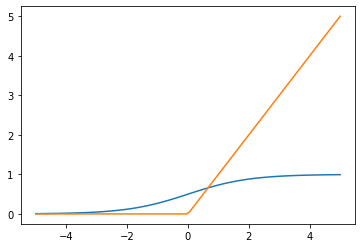

In [175]:
#@title funciones de activacion

#sigm = lambda x: 1/(1 + np.e ** (-x))
func = 0  # pos 0 en arr
derv = 1  # pos 1 en arr

sigm = (lambda x: 1/(1 + np.e ** (-x)), 
        lambda x: x * (1-x))

relu = (lambda x: np.maximum(0, x), 
        lambda x: 0 if x <= 0 else 1)

#sigm[0](1)

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[0](_x))
plt.plot(_x, relu[0](_x))

In [176]:
#@title funcion de costo
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
          lambda Yp, Yr: (Yp - Yr))

# func_costo, deriv_costo = l2_cost


In [177]:
#@title funcion para crear una red neuronal

#ideal poder utilizar distintas func activacion por capa
#l0 = capa_neuronal(p, 4, sigm)
#l1 = capa_neuronal(4, 1, sigm)

def crea_nn(topologia, act_f):
  nn = [] # red inicial 
  for l, layer in enumerate(topologia[:-1]):
    in_ = topologia[l]
    out_ = topologia[l+1]
    nn.append(capa_neuronal(in_, out_, act_f))
  return nn


In [ ]:
#@title random reploducibilidad
import random
random.seed(888)


In [ ]:
#@title creando red
topologia = [p, 4, 8, 1]
red = crea_nn(topologia, sigm)

In [179]:
#@title funcion de entrenamiento mas clara
def train(red, X, Y, l2_cost, lr=0.5, train=True):
  #X      = X_coord
  #Y      = Y_class
  #lr     = 0.5
  #train  = True

  #asigna la funcion de costo y su derivada
  func_costo, deriv_costo = l2_cost

  #primera capa de Entrada
  red[0].X              = X.copy()                           # X valor entrada primera capa

  #forward
  for l, layer in enumerate(red):                               # por cada capa de la primera hasta la ultima
    if(l>0):layer.X     = red[l-1].activa.copy()             # la salida de la anterior capa es la entrada de esta
    layer.neurona       = layer.X @ layer.W + layer.b           # neurona
    layer.activa        = layer.func_activacion(layer.neurona)  # activacion

  #calc loss en ultima capa
  layer.loss            = func_costo(layer.activa, Y)     # loss solo en ultima capa

  if(train):

    #backward
    for l in reversed(range(0, len(red))):
      layer             = red[l]                          # capa de la red
      layer.W_          = layer.W.copy()                  # respaldo W solo para historial
      layer.b_          = layer.b.copy()                  # respaldo b solo para historial

      #calc derivada activacion
      layer.dactiva      = layer.deriv_activacion(layer.activa) #layer.neurona)

      #calc responsabilidad
      if( l == len(red)-1):                               # ultima capa
        #anticipa next layer loss
        layer.dloss     = deriv_costo(layer.activa, Y)

        #modificacion a 1
        layer.dactiva      = layer.dactiva * 0
        layer.dactiva      = layer.dactiva + 1
      else :                                              # previas capas
        #copia loss arrastre precalculado
        layer.dloss     = red[l+1].dloss_back             # loss actual es Delta @ W_ original anterior

      #actualiza delta
      layer.delta       = layer.dloss * layer.dactiva     # delta_ant @ W_ant.T * dactiv(activ)

      #anticipa next layer loss
      layer.dloss_back  = layer.delta @ layer.W.T         # loss actual es Delta @ W_ original

      #gradiente 
      layer.grad_b      = np.mean(layer.delta, axis=0, keepdims=True)
      layer.grad_W      = layer.X.T @ layer.delta


      #actualiza los pesos    con gradiente descendente
      #lr_b = 1/(layer.n_salidas)
      layer.b           = layer.b - layer.grad_b * lr

      #lr = 1/(layer.n_entrada * layer.n_salidas)
      layer.W           = layer.W - layer.grad_W * lr

  #red[-1].activ                                          # ultima capa, activacion  
  return red[-1].activa                                    # ultima capa, activacion 

In [ ]:
#@title
#funcion de entrenamiento
def train(red, X, Y, l2_cost, lr=0.5, train=True):
  #X = X_coord
  #Y = Y_class
  #lr = 0.5
  #train = True

  #primera capa de Entrada
  red[0].X           = X.copy()                                   # X valor entrada primera capa

  #forward
  for l, layer in enumerate(red):                       # por cada capa de la primera hasta la ultima
    if(l>0): layer.X = red[l-1].activ.copy()            # la salida de la anterior capa es la entrada de esta
    #print(f"forward l:{l} X:{layer.X.shape} x W:{layer.W.shape} + b:{layer.b.shape}")
    layer.neurona    = layer.X @ layer.W + layer.b         # neurona
    layer.activ      = layer.act_f[func](layer.neurona)      # activacion

  #calc loss en ultima capa
  layer.loss      = l2_cost[func](layer.activ, Y)            # loss solo en ultima capa

  if(train):


    #gradiente desendente
    #layer.grad_b   = np.mean(layer.delta, axis=0, keepdims=True)
    #layer.grad_W   = layer.activ.T @ layer.delta
    #layer.grad_W   = layer.X.T @ layer.delta

    #actualiza los pesos
    #layer.b        = layer.b - layer.grad_b * lr
    #layer.W        = layer.W - layer.grad_W * lr


    #backward
    for l in reversed(range(0, len(red))):
      layer         = red[l]                  # capa de la red
      layer.W_      = layer.W.copy()          # respaldo W

      #calc derivada activacion
      layer.dactiv  = layer.act_f[derv](layer.activ)
      #print(f"dact l:{l} N:{layer.neurona.shape}  DACT{layer.dactiv.shape}  N:{layer.neurona}")

      #calc responsabilidad
      if( l == len(red)-1):                   # ultima capa
        #anticipa next layer loss
        #layer.dactiv    = layer.act_f[derv](layer.activ)
        layer.dloss     = l2_cost[derv](layer.activ, Y)
        #layer.delta     = layer.dloss * layer.dactiv
        #layer.W_        = layer.W.copy()          # respaldo W
        #layer.loss_back = layer.delta @ layer.W.T         # loss actual es Delta @ W_ original anterior
        None
        #print(f"last l:{l}")
        #layer.dloss = l2_cost[derv](layer.activ, Y)      l2_cost[derv](layer.activ, Y)
        #layer.delta = layer.loss * layer.dactiv
        #print(f"backward l:{l} X:{layer.X.shape} x Y:{layer.b.shape} + D:{len(layer.delta)} ")
        #print(f"DATOS l:{l} L:{l2_cost[derv](layer.activ, Y)} x ACT_D:{layer.dactiv} + D:{layer.delta} ")
      else :                                    # previas capas
        ##W_      = red[l+1].W_             # del respaldo W anterior
        ##delta   = red[l+1].delta          # delta previo
        ##layer.loss = delta @ W_.T         # loss actual es Delta @ W_ original anterior

        #copia loss arrastre precalculado
        layer.dloss  = red[l+1].dloss_back         # loss actual es Delta @ W_ original anterior
        #print(f"otras l:{l}")
        #print(f"delta l:{l} D:{red[l+1].delta}")
        #print(f"delta l:{l} DDDDD:{delta}")
        #print(f"DATOS l:{l} W:{W_.T} x ACT_D:{layer.dactiv} + D:{delta} ")
        #print(f"backwad l:{l} X:{layer.X.shape} x Y:{layer.b.shape} + D:{len(layer.delta)} Dx:{layer.delta.shape}")
        #layer.dloss = delta @ layer.W_.T 
        #layer.delta = delta @ layer.W_.T * layer.dactiv

      #actualiza delta
      layer.delta   = layer.dloss * layer.dactiv
      #layer.delta  = layer.loss * layer.dactiv
      #layer.delta  = layer.dloss * layer.dactiv
      #print(f"layer delta l:{l} DLOSS:{layer.dloss.shape} x DACT:{layer.dactiv.shape} + D:{len(layer.delta)} Dx:{layer.delta.shape}")
      #print(f"layer delta l:{l} DLOSS:{layer.dloss} x DACT:{layer.dactiv} + D:{len(layer.delta)} Dx:{layer.delta}")

      #anticipa next layer loss
      layer.dloss_back = layer.delta @ layer.W.T         # loss actual es Delta @ W_ original anterior

      #gradiente desendente
      layer.grad_b  = np.mean(layer.delta, axis=0, keepdims=True)
      #layer.grad_W = layer.activ.T @ layer.delta
      layer.grad_W  = layer.X.T @ layer.delta

      #actualiza los pesos
      layer.b       = layer.b - layer.grad_b * lr
      layer.W       = layer.W - layer.grad_W * lr

  #red[-1].activ                        # ultima capa, activacion  
  return red[-1].activ                        # ultima capa, activacion  


In [ ]:
#@title
for l, layer in enumerate(red):
  print(f"Layer:{l} -> {vars(layer)} \n")
  None
#vars(red[0])

In [ ]:
#@title  Imprimir las propiedades de obj de forma organizada
for l, layer in enumerate(red):
  print(f"\nLayer: {l}")
  for key, value in vars(layer).items():
    print(f"{key}: {value}")


Layer: 0
n_entrada: 2
n_salidas: 4
func_activacion: <function <lambda> at 0x7f91918bf160>
deriv_activacion: <function <lambda> at 0x7f91913ad790>
b: [[ 0.5594599  -0.42229982 -0.17436747 -0.74081021]]
W: [[ 0.56028011  0.92007317  0.81272205 -0.00757879]
 [-0.34342012 -0.01406495 -0.39352347  0.57730892]]
W_: [[ 0.56132769  0.92016929  0.81287633 -0.00784779]
 [-0.34255417 -0.01378073 -0.39350431  0.57720193]]
X: [[-0.48871225 -0.17299248]
 [ 0.09575208 -0.388011  ]
 [ 0.51673007  0.01187517]
 [ 0.19163239  0.88559552]
 [-0.8060531  -0.56556721]
 [-0.81880723  0.55190512]
 [-0.29389596  0.26188468]
 [ 0.10444856  0.47017052]
 [ 0.34110359 -0.93188005]
 [ 1.03496643 -0.02271834]]
neurona: [[ 0.34718277 -0.86889141 -0.50331807 -0.83769421]
 [ 0.74891428 -0.32812217  0.05638986 -0.96639007]
 [ 0.84823821  0.05373812  0.24123598 -0.73887875]
 [ 0.36645532 -0.25744729 -0.36684095 -0.23201437]
 [ 0.30352868 -1.15548874 -0.60679708 -1.06179868]
 [-0.08642537 -1.1826243  -1.05689479 -0.416691

In [ ]:
#@title
layer.W.shape, layer.grad_W.shape

((4, 8), (8, 8))

In [ ]:
#@title
layer.activ.T.shape, layer.delta.shape

((8, 10), (10, 8))

In [ ]:
#@title
layer.activ.T @ layer.delta

array([[ 0.05229722, -0.05792131, -0.02364503, -0.01670879,  0.05328396,
         0.02234197, -0.04943139,  0.04967762],
       [ 0.04769252, -0.05289323, -0.02157925, -0.015254  ,  0.0488222 ,
         0.02039752, -0.04509285,  0.04542674],
       [ 0.07208785, -0.07987288, -0.03257746, -0.02299602,  0.07351057,
         0.03079684, -0.06814321,  0.06838859],
       [ 0.02434608, -0.02698204, -0.01104183, -0.00784034,  0.02491848,
         0.01042023, -0.02301614,  0.02334956],
       [ 0.07547871, -0.08358167, -0.03410978, -0.02408724,  0.07683365,
         0.032235  , -0.07133961,  0.07159108],
       [ 0.04404607, -0.04882902, -0.01994642, -0.01412408,  0.04506459,
         0.01884131, -0.04164186,  0.04205568],
       [ 0.05445094, -0.06038003, -0.02463846, -0.01741962,  0.05571879,
         0.02328669, -0.05148135,  0.05186929],
       [ 0.08049324, -0.08917272, -0.03635646, -0.02564269,  0.08200853,
         0.03437604, -0.0760857 ,  0.07623466]])

In [ ]:
#@title
delta @  layer.W_.T

In [ ]:
#@title
 layer.W_.T

array([[-0.6611457 ,  0.62973521,  0.39368762, -0.50317098],
       [ 0.1459031 , -0.518754  ,  0.04397627, -0.52233526],
       [ 0.51669848,  0.84256351,  0.9832069 ,  0.77593359],
       [-0.97418716,  0.46128924, -0.35193395, -0.34988308],
       [-0.00491423,  0.50726172,  0.64407747, -0.82245804],
       [-0.41895597,  0.77629002, -0.92309638,  0.97469166],
       [ 0.78942643,  0.03530997,  0.96242662, -0.38597567],
       [ 0.49085145,  0.00472411,  0.26400078,  0.15931611]])

In [ ]:
#@title
layer.W_ * layer.dactiv.T

In [ ]:
#@title
red[2].X

In [ ]:
#@title
red[2].dloss, red[2].dactiv

In [ ]:
#@title
l, red[2].delta

In [ ]:
#@title
red[2].dloss , red[2].dactiv

In [ ]:
#@title
layer.W_.shape, delta.shape, layer.dloss.shape, layer.activ.shape, layer.neurona.shape

((8, 1), (10, 1), (10, 1), (10, 1), (10, 1))

In [ ]:
#@title
red[0]

In [ ]:
#@title imprimir formas de capas
for l, layer in enumerate(red):
  print(f"capa: {l}, X:{layer.X.shape}, W:{layer.W.shape}, b:{layer.b.shape}, N:{layer.neurona.shape}, A:{layer.activa.shape}, D:{layer.delta.shape}, GW:{layer.grad_W.shape}, Gb:{layer.grad_b.shape}, DlB:{layer.dloss_back.shape}")
  #for param in enumerate(layer):
  #   print(param[0])


capa: 0, X:(10, 2), W:(2, 4), b:(1, 4), N:(10, 4), A:(10, 4), D:(10, 4), GW:(2, 4), Gb:(1, 4), DlB:(10, 2)
capa: 1, X:(10, 4), W:(4, 8), b:(1, 8), N:(10, 8), A:(10, 8), D:(10, 8), GW:(4, 8), Gb:(1, 8), DlB:(10, 4)
capa: 2, X:(10, 8), W:(8, 0), b:(1, 0), N:(10, 0), A:(10, 0), D:(10, 0), GW:(8, 0), Gb:(1, 0), DlB:(10, 8)


In [ ]:
len(red)

3

In [ ]:
#@title
for l in reversed(range(0, len(red))):
 print(l)

2
1
0


In [ ]:
#@title
red[1].delta, l, len(red)-1


([], 1, 2)

In [ ]:
#@title funcion de entrenamiento orig
def train(red, X, Y, l2_cost, lr=0.5, train=True):
  #X = X_coord
  #Y = Y_class
  #lr = 0.5
  #train = True

  #out = [(z0, a0), (z1, a1)]   Neurona y Activacion
  neur = 0  # pos 0 en arr
  actv = 1  # pos 1 en arr
  out = [(None, X)] # X valor entrada primera capa

  #forward
  for l, layer in enumerate(red): #[:-1]):    # por cada capa de la primera hasta la penultima
    #print(l, layer)
    x_ = out[l][actv] # nueva entrada para esta capa
    #print(f"forward l:{l} X:{x_.shape} x W:{layer.W.shape} + b:{layer.b.shape}")
    z = x_ @ red[l].W + red[l].b  # neurona
    a = red[l].act_f[func](z)     # activacion
    out.append((z, a))            # salida de esta y entrada proxima capa
  #print(out)
  #print(l2_cost[func](out[-1][actv], Y))

  #print("AAA", out)
  #print("BBB", out[-1])
  #print("CCC", out[-1][actv])

  if(train):
    #backward
    deltas = []   # insertara en la prim posicion [0]
    #for l in reversed(range(0, len(red))):
    for l in reversed(range(0, len(red))):
      z = out[l+1][neur]    # neurona ultima capa
      a = out[l+1][actv]    # activacion ultima capa

      if( l == len(red)-1): # ultima capa
        #print(f"LAST:{l}")
        deltas.insert(0, l2_cost[derv](a, Y) * red[l].act_f[derv](a) )
        #print(f"DELTAS: {deltas[0]} L:{l2_cost[derv](a, Y)} ACTderv:{red[l].act_f[derv](a)}")
      else :                # previas capas
        #print(f"OTROS:{l}")
        deltas.insert(0, deltas[0] @  w_.T  *  red[l].act_f[derv](a) )
        #print(f"DELTAS: {deltas[0]} W:{w_.T} ACTderv:{red[l].act_f[derv](a)}")
      #print(f"backward l:{l} X:{a.shape} x Y:{Y.shape} + D:{len(deltas)} Dx:{deltas[0].shape}")

      w_ = red[l].W.copy()
      #gradiente desc
      red[l].b = red[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr 
      red[l].W = red[l].W - out[l][actv].T @ deltas[0] * lr 

  #out[-1][actv]   # ultima capa, activacion  
  return out[-1][actv]   # ultima capa, activacion  


In [ ]:
#@title
deltas[2].shape

(10, 1)

In [ ]:
#@title
X, out[0]

(array([[ 0.0796081 , -0.47792308],
        [ 0.94580899, -0.03637675],
        [ 0.33323536, -0.8837254 ],
        [-0.45218419, -0.26324709],
        [ 0.46475657, -0.10510195],
        [ 0.1044434 ,  0.42035808],
        [ 0.18521957,  0.92004546],
        [-0.75481632, -0.574926  ],
        [-0.39773426,  0.31675171],
        [-0.77669546,  0.59383067]]), (None, array([[ 0.0796081 , -0.47792308],
         [ 0.94580899, -0.03637675],
         [ 0.33323536, -0.8837254 ],
         [-0.45218419, -0.26324709],
         [ 0.46475657, -0.10510195],
         [ 0.1044434 ,  0.42035808],
         [ 0.18521957,  0.92004546],
         [-0.75481632, -0.574926  ],
         [-0.39773426,  0.31675171],
         [-0.77669546,  0.59383067]])))

In [205]:
#@title creando red
topologia = [2, 3, 1]
red = crea_nn(topologia, sigm)

In [229]:
#@title entrenamiento base
train(red, X_coord, Y_class, l2_cost, 0.99)

array([[0.43184122],
       [0.45610706],
       [0.4437355 ],
       [0.45822706],
       [0.46034297],
       [0.43241777],
       [0.47190033],
       [0.46224866],
       [0.44196586],
       [0.45538012]])

In [ ]:
#@title
for l in reversed(range(0, len(red))):
  print (l )

2
1
0


In [ ]:
#@title
for l  in enumerate(reversed(range(0, len(red)))):
  print (l )

(0, 2)
(1, 1)
(2, 0)


In [ ]:
#@title
len(red), range(0, len(red)), reversed(range(0, len(red)))

(3, range(0, 3), <range_iterator at 0x7fd9fdb957b0>)

In [ ]:
#@title
X_coord[0]

array([-0.3268381 ,  0.24620944])

In [ ]:
#@title
red

In [ ]:
#@title
red[:-1]

In [ ]:
#@title
for l, layer in enumerate(red[:-1]):    # de la primera hasta la penultima
    print(l, layer)

0 <__main__.capa_neuronal object at 0x7fd9ff5c3670>
1 <__main__.capa_neuronal object at 0x7fd9ff5edc10>


In [ ]:
#@title
np.random.rand(2, 5) 

array([[0.59526058, 0.57757229, 0.08363081, 0.60117299, 0.03849489],
       [0.81383712, 0.54299208, 0.44524148, 0.79295923, 0.36377786]])

In [ ]:
topologia = [p, 4, 8, 1]
#topologia = [p, 3, 1]
red = crea_nn(topologia, sigm)

red[0].rollback()
red[1].rollback()
red[2].rollback()


In [231]:
#recupera los estados de los pesos de W_ y b_
red[0].rollback()
red[1].rollback()

# reinicia los frames y loss para la grafica
loss = []
frames = []

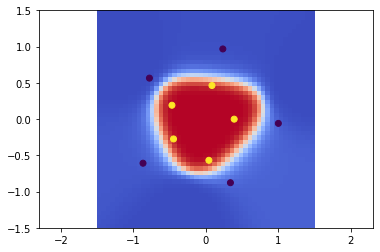

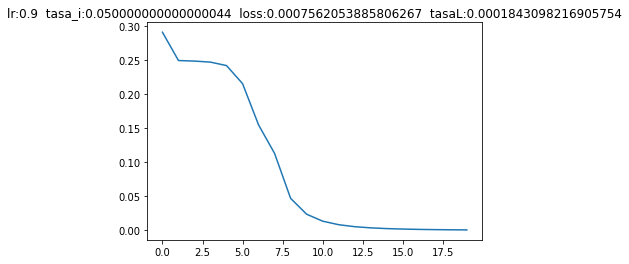

In [233]:
#@title proceso de entrenamiento y test
import time
from IPython.display import clear_output

#random.seed(888)

topologia = [p, 4, 8, 1]
topologia = [p, 3, 1]
red = crea_nn(topologia, sigm)

##WL1 = np.array([[ 8.84243203,  2.1386732 ,  2.94748844],   [ 0.78027067,  4.12606739, -4.23355456]])
#WL1 = np.array([[ 1,  2.1386732 ,  2.94748844],   [ 0.78027067,  4.12606739, -4.23355456]])

##bL1 = np.array([[ 3.7654632 , -3.25091011, -2.91781571]])
#bL1 = np.array([[ -2 , -3.25091011, -2.91781571]])

##WL2 = np.array([[ 14.3519784 ],  [-18.93268329],  [-17.98428509]])
#WL2 = np.array([[ 3.3519784 ],  [-18.93268329],  [-17.98428509]])

##bL2 = np.array([[-2.53003652]])
##bL2 = np.array([[0.53003652]])

##red[0].W, red[0].b = WL1, bL1
##red[1].W, red[1].b = WL2, bL2

red[0].snapshot()
red[1].snapshot()
#red[2].snapshot()

loss = []
LR = 1
lr = 0.9
tasa_var_loss  = 0
iteraciones = 500

for i in range(iteraciones):
  #lr = LR * (1-(i/iteraciones))
  Py = train(red, X_coord, Y_class, l2_cost, lr)     # entrenamiento

  if i%25 ==0:
    loss.append(l2_cost[0](Py, Y_class))      # LOSS del entrenamiento

    if(len(loss) > 4):
      None
      #tasa_var_loss = loss[-1] / loss[-3] #loss[-3] - loss[-1] 
      #lr = lr / (tasa_var_loss)
      #if(tasa_var_loss > 0.001 ): lr *= tasa_var_loss #1.001
      #else:  lr *= 0.999

    res = 50
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)
    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(red, np.array([[x0, x1]]), Y_class, l2_cost, train=False)[0,0]   # verificacion

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")           # imprime la malla de resultados de la verificacion
    plt.axis("equal")

    #plt.scatter(X_coord[:,0], X_coord[:,1], c=Y_class)
    plt.scatter(X_coord[:,0], X_coord[:,1], c=Y_class)      # imprime los puntos

    clear_output(wait=True)
    plt.show()
    #TasaL = loss[-2]-loss[-1] if i>50: 0
    plt.title(f'lr:{lr}  tasa_i:{(1-(i/iteraciones))}  loss:{loss[-1]}  tasaL:{loss[-2]-loss[-1] if i>50 else 0}')
    plt.plot(range(len(loss)), loss)                        # imprime el loss
    plt.show()
    time.sleep(0.5)

In [ ]:
red[0].W, red[0].b, red[1].W, red[1].b, red[1].dactiva

(array([[ 7.30410233,  3.18545247,  3.79446622],
        [ 0.93205474,  5.01502387, -4.3109017 ]]),
 array([[ 4.02713121, -3.54252295, -3.3313454 ]]),
 array([[ 8.1859719 ],
        [-8.04364196],
        [-7.53549573]]),
 array([[-3.30310356]]),
 array([[0.06978994],
        [0.11347921],
        [0.10891599],
        [0.10919732],
        [0.06381503],
        [0.11554215],
        [0.10669086],
        [0.12291645],
        [0.08552878],
        [0.03161039]]))

In [ ]:
red[1].b = np.array([[-2.53003652]])

In [ ]:
arr = np.full((3, 2), 0.5)
arr

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]])

In [ ]:
arr = np.zeros((3, 2))
arr

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
arr = np.random.rand(1, 2) #* 2 -1
arr

array([[0.82116878, 0.70407406]])

In [ ]:
arr_pos = np.full((2, 3//2), 0.5)
arr_neg = np.full((2, 3//2), -0.5)
arr = np.hstack((arr_pos, arr_neg))
arr

array([[ 0.5, -0.5],
       [ 0.5, -0.5]])

In [ ]:
#@title
red[0].W.shape

(2, 4)

In [ ]:
#respalda el estado de los pesos en W_ y b_
red[0].snapshot()
red[1].snapshot()

In [ ]:
#recupera los estados de los pesos de W_ y b_
red[0].rollback()
red[1].rollback()

# reinicia los frames y loss para la grafica
loss = []
frames = []

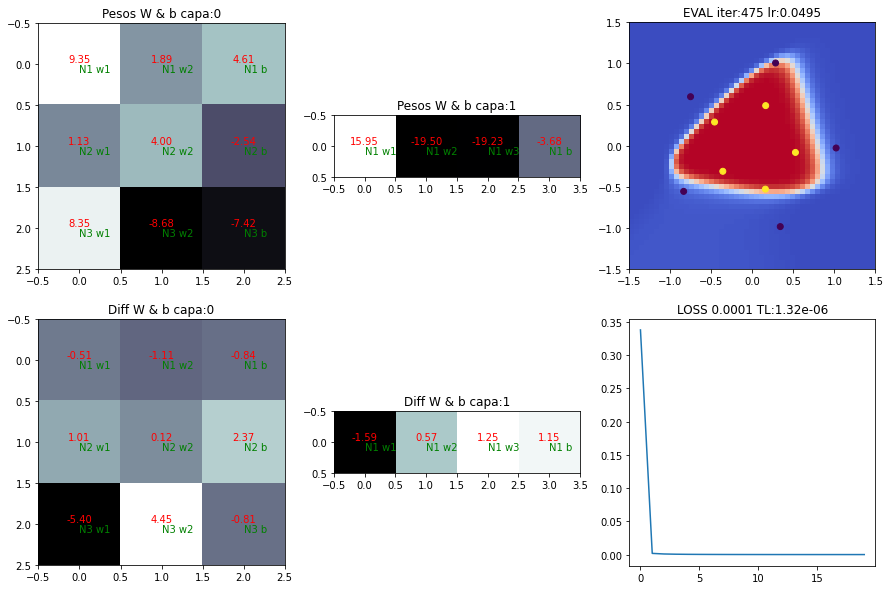

In [ ]:
#@title proceso de RE-entrenamiento a partir de pesos optimos alterados
import time
from IPython.display import clear_output

CONTINUAR = True   # primer ciclo o continuacion

#random.seed(777)
#topologia = [p, 4, 8, 1]
#red = crea_nn(topologia, sigm)

#print(red.shape)
#red = []
#red.append(capa_neuronal(2, 4, sigm, 5))
#red.append(capa_neuronal(4, 8, sigm, 3))
#red.append(capa_neuronal(8, 1, sigm, 10))

#random.seed(888)

topologia = [p, 3, 1]
if(CONTINUAR!=True): red = crea_nn(topologia, sigm)

"""
WL1 = np.array([[ 8.84243203,  2.1386732 ,  2.94748844],   [ 0.78027067,  4.12606739, -4.23355456]])
#WL1 = np.array([[ 1,  2.1386732 ,  2.94748844],   [ 0.78027067,  4.12606739, -4.23355456]])

bL1 = np.array([[ 3.7654632 , -3.25091011, -2.91781571]])
#bL1 = np.array([[ -2 , -3.25091011, -2.91781571]])

WL2 = np.array([[ 14.3519784 ],  [-18.93268329],  [-17.98428509]])
#WL2 = np.array([[ 3.3519784 ],  [-18.93268329],  [-17.98428509]])

bL2 = np.array([[-2.53003652]])
bL2 = np.array([[0.53003652]])

red[0].W, red[0].b = WL1, bL1
red[1].W, red[1].b = WL2, bL2
"""

if(CONTINUAR!=True): red[0].snapshot()
if(CONTINUAR!=True): red[1].snapshot()


#red[0].rollback()
#red[1].rollback()


lr = LR = 0.99
iter = 500
TL = 0

if(CONTINUAR!=True): loss = []
if(CONTINUAR!=True): frames = []

if(CONTINUAR!=True): L1 = []
if(CONTINUAR!=True): L2 = []

for i in range(iter):
  if(TL<1e-3): lr = LR * (1-i/iter)
  Py = train(red, X_coord, Y_class, l2_cost, lr)     # entrenamiento


  if i%25 ==0:
    loss.append(l2_cost[0](Py, Y_class))      # LOSS del entrenamiento

    #L1.append(red[0].backup())
    #L2.append(red[1].backup())

    #EVAL
    res = 50
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)
    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(red, np.array([[x0, x1]]), Y_class, l2_cost, train=False)[0,0]   # verificacion


    # IMPRIME GRAFICO
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    clear_output(wait=True)

    #fig, ax = plt.subplots()
    for l, Nlayer in enumerate(red):
      #layer = Nlayer.W.copy()
      #layer[0].append(Nlayer[0].b)
      layer = np.concatenate((Nlayer.W, Nlayer.b), axis=0)

      ax[0,l].set_title(f'Pesos W & b capa:{l}')
      #pone numeros
      ##for a in range(layer.shape[0]): #layer.W.shape[0]):
      ##  for b in range(layer.shape[1]): #layer.W.shape[1]):
      ##      ax[0,l].text(a, b, '{:.2f}'.format(layer[a, b]), ha='center', va='center', color='red')

      for a in range(layer.shape[0]): #layer.W.shape[0]):
        last = layer.shape[0]-1
        for b in range(layer.shape[1]): #layer.W.shape[1]):
            #ha: 'center', 'right', 'left'
            #va: 'top', 'bottom', 'center', 'baseline', 'center_baseline'
            ax[0,l].text(a, b, '{:.2f}'.format(layer[a, b]), ha='center', va='bottom', color='red')
            ww = "b"
            if a<last : ww = f"w{a+1}"
            ax[0,l].text(a, b, f'N{b+1} {ww}', ha='left', va='top', color='green')

      #imprime    
      #ax.matshow(layer.W)
      ax[0,l].imshow(layer.T, cmap='bone') # cmap='gray'   cmap='binary'  cmap='hot'
      #ax[1,l].imshow(layer.b, cmap='bone') # cmap='gray'   cmap='binary'  cmap='hot'

      #limpia
      for a in range(layer.shape[0]):
        for b in range(layer.shape[1]):
            ax[0,l].text(a, b, '')






    for l, Nlayer in enumerate(red):
      layer = np.concatenate((Nlayer.W_i - Nlayer.W, Nlayer.b_i - Nlayer.b), axis=0)

      ax[1,l].set_title(f'Diff W & b capa:{l}')
      #pone numeros
      ##for a in range(layer.shape[0]): #layer.W.shape[0]):
      ##  for b in range(layer.shape[1]): #layer.W.shape[1]):
      ##      ax[1,l].text(a, b, '{:.3f}'.format(layer[a, b]), ha='center', va='center', color='red')

      for a in range(layer.shape[0]): #layer.W.shape[0]):
        last = layer.shape[0]-1
        for b in range(layer.shape[1]): #layer.W.shape[1]):
            #ha: 'center', 'right', 'left'
            #va: 'top', 'bottom', 'center', 'baseline', 'center_baseline'
            ax[1,l].text(a, b, '{:.2f}'.format(layer[a, b]), ha='center', va='bottom', color='red')
            ww = "b"
            if a<last : ww = f"w{a+1}"
            ax[1,l].text(a, b, f'N{b+1} {ww}', ha='left', va='top', color='green')

      #imprime    
      #ax.matshow(layer.W)
      ax[1,l].imshow(layer.T, cmap='bone') # cmap='gray'   cmap='binary'  cmap='hot'

      #limpia
      for a in range(layer.shape[0]):
        for b in range(layer.shape[1]):
            ax[1,l].text(a, b, '')




    ax[0,2].set_title(f'EVAL iter:{i} lr:{lr:.4f}')
    ax[0,2].pcolormesh(_x0, _x1, _Y, cmap="coolwarm")           # imprime la malla de resultados de la verificacion
    ax[0,2].axis("equal")

    #plt.scatter(X_coord[:,0], X_coord[:,1], c=Y_class)
    ax[0,2].scatter(X_coord[:,0], X_coord[:,1], c=Y_class)      # imprime los puntos

    #plt.show()
    TL = loss[-2]-loss[-1] if i>50 else 0
    ax[1,2].set_title(f'LOSS {loss[-1]:.4f} TL:{TL:.2e}')
    ax[1,2].plot(range(len(loss)), loss)                        # imprime el loss
    #plt.show()

    # FRAMES PARA VIDEO
    """
    figu = plt.gcf()
    figu.canvas.draw()
    image = np.frombuffer(figu.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(figu.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)
    """
    plt.show()

    #time.sleep(1)

# Muestra el video
#media.show_video(frames, fps=3)

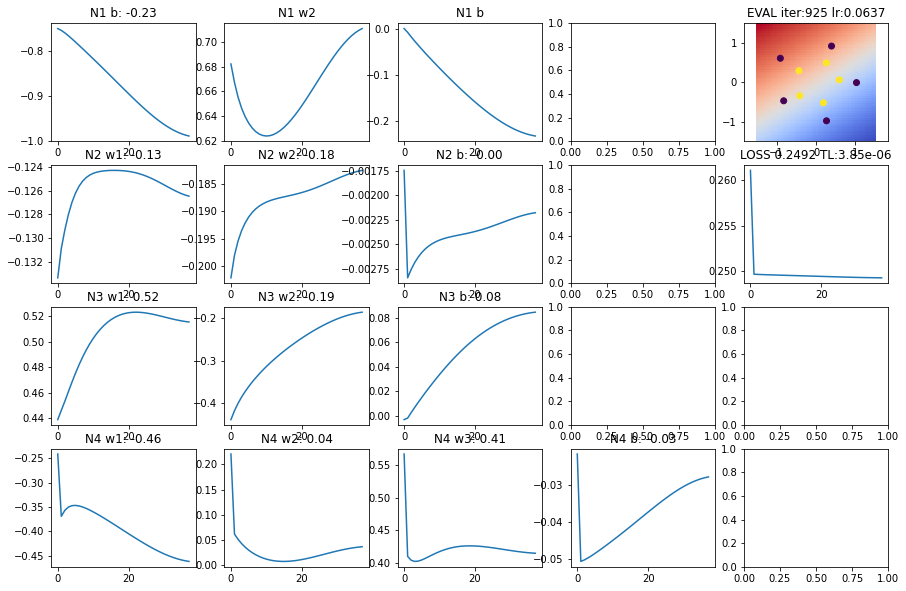

KeyboardInterrupt: ignored

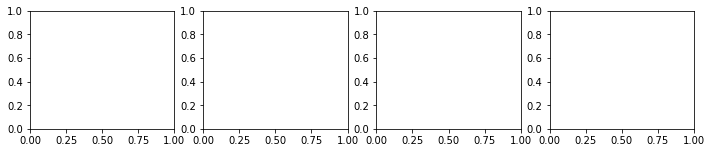

In [ ]:
#@title GRAFICA DETALLADA proceso de RE-entrenamiento a partir de pesos optimos alterados
import time
from IPython.display import clear_output

CONTINUAR = False   # primer ciclo o continuacion

#random.seed(777)
#topologia = [p, 4, 8, 1]
#red = crea_nn(topologia, sigm)

#print(red.shape)
#red = []
#red.append(capa_neuronal(2, 4, sigm, 5))
#red.append(capa_neuronal(4, 8, sigm, 3))
#red.append(capa_neuronal(8, 1, sigm, 10))

#random.seed(888)

topologia = [p, 3, 1]
if(CONTINUAR!=True): red = crea_nn(topologia, sigm)

"""
WL1 = np.array([[ 8.84243203,  2.1386732 ,  2.94748844],   [ 0.78027067,  4.12606739, -4.23355456]])
#WL1 = np.array([[ 1,  2.1386732 ,  2.94748844],   [ 0.78027067,  4.12606739, -4.23355456]])

bL1 = np.array([[ 3.7654632 , -3.25091011, -2.91781571]])
#bL1 = np.array([[ -2 , -3.25091011, -2.91781571]])

WL2 = np.array([[ 14.3519784 ],  [-18.93268329],  [-17.98428509]])
#WL2 = np.array([[ 3.3519784 ],  [-18.93268329],  [-17.98428509]])

bL2 = np.array([[-2.53003652]])
bL2 = np.array([[0.53003652]])

red[0].W, red[0].b = WL1, bL1
red[1].W, red[1].b = WL2, bL2
"""

if(CONTINUAR!=True): red[0].snapshot()
if(CONTINUAR!=True): red[1].snapshot()

#red[0].rollback()
#red[1].rollback()


lr = LR = 0.85
iter = 1000
TL = 0

if(CONTINUAR!=True): loss = []
if(CONTINUAR!=True): frames = []

if(CONTINUAR!=True): L1 = []
if(CONTINUAR!=True): L2 = []


W1 = []
W2 = []
W3 = []
W4 = []
W5 = []
W6 = []
W7 = []
W8 = []
W9 = []
B1 = []
B2 = []
B3 = []
B4 = []


for i in range(iter):
  if(TL<1e-3): lr = LR * (1-i/iter)
  Py = train(red, X_coord, Y_class, l2_cost, lr)     # entrenamiento


  if i%25 ==0:
    loss.append(l2_cost[0](Py, Y_class))      # LOSS del entrenamiento

    #L1.append(red[0].backup())
    #L2.append(red[1].backup())

    #EVAL
    res = 50
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)
    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(red, np.array([[x0, x1]]), Y_class, l2_cost, train=False)[0,0]   # verificacion

    """
    # IMPRIME GRAFICO
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    clear_output(wait=True)

    #fig, ax = plt.subplots()
    for l, Nlayer in enumerate(red):
      #layer = Nlayer.W.copy()
      #layer[0].append(Nlayer[0].b)
      layer = np.concatenate((Nlayer.W, Nlayer.b), axis=0)

      ax[0,l].set_title(f'Pesos W & b capa:{l}')
      #pone numeros
      ##for a in range(layer.shape[0]): #layer.W.shape[0]):
      ##  for b in range(layer.shape[1]): #layer.W.shape[1]):
      ##      ax[0,l].text(a, b, '{:.2f}'.format(layer[a, b]), ha='center', va='center', color='red')

      for a in range(layer.shape[0]): #layer.W.shape[0]):
        last = layer.shape[0]-1
        for b in range(layer.shape[1]): #layer.W.shape[1]):
            #ha: 'center', 'right', 'left'
            #va: 'top', 'bottom', 'center', 'baseline', 'center_baseline'
            ax[0,l].text(a, b, '{:.2f}'.format(layer[a, b]), ha='center', va='bottom', color='red')
            ww = "b"
            if a<last : ww = f"w{a+1}"
            ax[0,l].text(a, b, f'N{b+1} {ww}', ha='left', va='top', color='green')

      #imprime    
      #ax.matshow(layer.W)
      ax[0,l].imshow(layer.T, cmap='bone') # cmap='gray'   cmap='binary'  cmap='hot'
      #ax[1,l].imshow(layer.b, cmap='bone') # cmap='gray'   cmap='binary'  cmap='hot'

      #limpia
      for a in range(layer.shape[0]):
        for b in range(layer.shape[1]):
            ax[0,l].text(a, b, '')

      """








    """
    for l, Nlayer in enumerate(red):
      layer = np.concatenate((Nlayer.W_i - Nlayer.W, Nlayer.b_i - Nlayer.b), axis=0)

      ax[1,l].set_title(f'Diff W & b capa:{l}')
      #pone numeros
      ##for a in range(layer.shape[0]): #layer.W.shape[0]):
      ##  for b in range(layer.shape[1]): #layer.W.shape[1]):
      ##      ax[1,l].text(a, b, '{:.3f}'.format(layer[a, b]), ha='center', va='center', color='red')

      for a in range(layer.shape[0]): #layer.W.shape[0]):
        last = layer.shape[0]-1
        for b in range(layer.shape[1]): #layer.W.shape[1]):
            #ha: 'center', 'right', 'left'
            #va: 'top', 'bottom', 'center', 'baseline', 'center_baseline'
            ax[1,l].text(a, b, '{:.2f}'.format(layer[a, b]), ha='center', va='bottom', color='red')
            ww = "b"
            if a<last : ww = f"w{a+1}"
            ax[1,l].text(a, b, f'N{b+1} {ww}', ha='left', va='top', color='green')

      #imprime    
      #ax.matshow(layer.W)
      ax[1,l].imshow(layer.T, cmap='bone') # cmap='gray'   cmap='binary'  cmap='hot'

      #limpia
      for a in range(layer.shape[0]):
        for b in range(layer.shape[1]):
            ax[1,l].text(a, b, '')
      """


    layer = red[0]
    W1.append(layer.W[0][0])
    W2.append(layer.W[1][0])
    B1.append(layer.b[0][0])

    W3.append(layer.W[0][1])
    W4.append(layer.W[1][1])
    B2.append(layer.b[0][1])

    W5.append(layer.W[0][2])
    W6.append(layer.W[1][2])
    B3.append(layer.b[0][2])

    layer = red[1]
    W7.append(layer.W[0][0])
    W8.append(layer.W[1][0])
    W9.append(layer.W[2][0])
    B4.append(layer.b[0][0])

    # IMPRIME GRAFICO
    fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(15, 10))
    clear_output(wait=True)


    #ax[0,0].text('{:.2f}'.format(W1[-1]), ha='center', va='bottom', color='red')
    #ax[0,0].text(f'N{1} w{1}', ha='left', va='top', color='green')
    ax[0,0].set_title(f"N1 w1: {W1[-1]:.2f}")
    ax[0,0].plot(W1, label='W1')
    ax[0,1].set_title("N1 w2")
    ax[0,0].set_title(f"N1 w2: {W2[-1]:.2f}")
    ax[0,1].plot(W2, label='W2')
    ax[0,2].set_title("N1 b")
    ax[0,0].set_title(f"N1 b: {B1[-1]:.2f}")
    ax[0,2].plot(B1, label='b1')

    ax[1,0].set_title(f"N2 w1: {W3[-1]:.2f}")
    ax[1,0].plot(W3, label='W3')
    ax[1,1].set_title(f"N2 w2: {W4[-1]:.2f}")
    ax[1,1].plot(W4, label='W4')
    ax[1,2].set_title(f"N2 b: {B2[-1]:.2f}")
    ax[1,2].plot(B2, label='b2')

    ax[2,0].set_title(f"N3 w1: {W5[-1]:.2f}")
    ax[2,0].plot(W5, label='W5')
    ax[2,1].set_title(f"N3 w2: {W6[-1]:.2f}")
    ax[2,1].plot(W6, label='W6')
    ax[2,2].set_title(f"N3 b: {B3[-1]:.2f}")
    ax[2,2].plot(B3, label='b3')
    #ax[0,0].legend(loc='lower right')
    #plt.show()

    ax[3,0].set_title(f"N4 w1: {W7[-1]:.2f}")
    ax[3,0].plot(W7, label='W7')
    ax[3,1].set_title(f"N4 w2: {W8[-1]:.2f}")
    ax[3,1].plot(W8, label='W8')
    ax[3,2].set_title(f"N4 w3: {W9[-1]:.2f}")
    ax[3,2].plot(W9, label='W9')
    ax[3,3].set_title(f"N4 b: {B4[-1]:.2f}")
    ax[3,3].plot(B4, label='b4')
    #ax[0,0].legend(loc='lower right')
    #plt.show()





    ax[0,4].set_title(f'EVAL iter:{i} lr:{lr:.4f}')
    ax[0,4].pcolormesh(_x0, _x1, _Y, cmap="coolwarm")           # imprime la malla de resultados de la verificacion
    ax[0,4].axis("equal")

    #plt.scatter(X_coord[:,0], X_coord[:,1], c=Y_class)
    ax[0,4].scatter(X_coord[:,0], X_coord[:,1], c=Y_class)      # imprime los puntos

    #plt.show()
    TL = loss[-2]-loss[-1] if i>50 else 0
    ax[1,4].set_title(f'LOSS {loss[-1]:.4f} TL:{TL:.2e}')
    ax[1,4].plot(range(len(loss)), loss)                        # imprime el loss
    #plt.show()

    """
    # FRAMES PARA VIDEO
    figu = plt.gcf()
    figu.canvas.draw()
    image = np.frombuffer(figu.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(figu.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)
    """

    plt.show()

    #time.sleep(1)

# Muestra el video
#media.show_video(frames, fps=3)

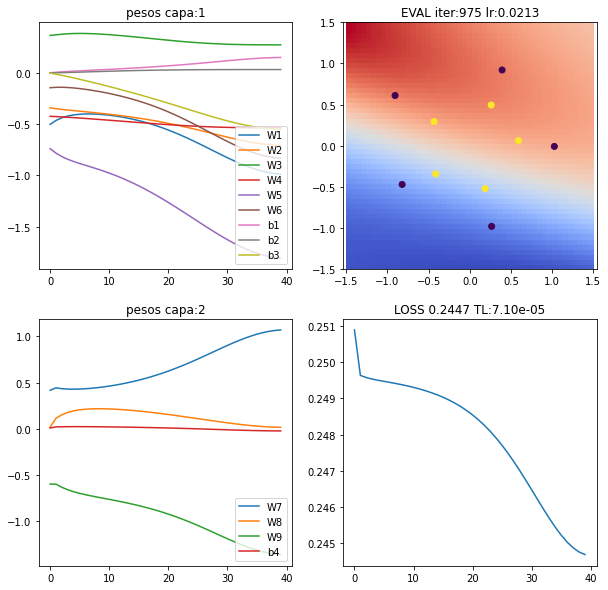

In [ ]:
#@title GRAFICA UNIDA  proceso de RE-entrenamiento a partir de pesos optimos alterados
import time
from IPython.display import clear_output

CONTINUAR = False   # primer ciclo o continuacion

#random.seed(777)
#topologia = [p, 4, 8, 1]
#red = crea_nn(topologia, sigm)

#print(red.shape)
#red = []
#red.append(capa_neuronal(2, 4, sigm, 5))
#red.append(capa_neuronal(4, 8, sigm, 3))
#red.append(capa_neuronal(8, 1, sigm, 10))

#random.seed(888)

topologia = [p, 3, 1]
if(CONTINUAR!=True): red = crea_nn(topologia, sigm)

"""
WL1 = np.array([[ 8.84243203,  2.1386732 ,  2.94748844],   [ 0.78027067,  4.12606739, -4.23355456]])
#WL1 = np.array([[ 1,  2.1386732 ,  2.94748844],   [ 0.78027067,  4.12606739, -4.23355456]])

bL1 = np.array([[ 3.7654632 , -3.25091011, -2.91781571]])
#bL1 = np.array([[ -2 , -3.25091011, -2.91781571]])

WL2 = np.array([[ 14.3519784 ],  [-18.93268329],  [-17.98428509]])
#WL2 = np.array([[ 3.3519784 ],  [-18.93268329],  [-17.98428509]])

bL2 = np.array([[-2.53003652]])
bL2 = np.array([[0.53003652]])

red[0].W, red[0].b = WL1, bL1
red[1].W, red[1].b = WL2, bL2
"""

if(CONTINUAR!=True): red[0].snapshot()
if(CONTINUAR!=True): red[1].snapshot()

#red[0].rollback()
#red[1].rollback()


lr = LR = 0.85
iter = 1000
TL = 0

if(CONTINUAR!=True): loss = []
if(CONTINUAR!=True): frames = []

if(CONTINUAR!=True): L1 = []
if(CONTINUAR!=True): L2 = []


W1 = []
W2 = []
W3 = []
W4 = []
W5 = []
W6 = []
W7 = []
W8 = []
W9 = []
B1 = []
B2 = []
B3 = []
B4 = []


for i in range(iter):
  if(TL<1e-3): lr = LR * (1-i/iter)
  Py = train(red, X_coord, Y_class, l2_cost, lr)     # entrenamiento


  if i%25 ==0:
    loss.append(l2_cost[0](Py, Y_class))      # LOSS del entrenamiento

    #L1.append(red[0].backup())
    #L2.append(red[1].backup())

    #EVAL
    res = 50
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)
    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(red, np.array([[x0, x1]]), Y_class, l2_cost, train=False)[0,0]   # verificacion

    """
    # IMPRIME GRAFICO
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    clear_output(wait=True)

    #fig, ax = plt.subplots()
    for l, Nlayer in enumerate(red):
      #layer = Nlayer.W.copy()
      #layer[0].append(Nlayer[0].b)
      layer = np.concatenate((Nlayer.W, Nlayer.b), axis=0)

      ax[0,l].set_title(f'Pesos W & b capa:{l}')
      #pone numeros
      ##for a in range(layer.shape[0]): #layer.W.shape[0]):
      ##  for b in range(layer.shape[1]): #layer.W.shape[1]):
      ##      ax[0,l].text(a, b, '{:.2f}'.format(layer[a, b]), ha='center', va='center', color='red')

      for a in range(layer.shape[0]): #layer.W.shape[0]):
        last = layer.shape[0]-1
        for b in range(layer.shape[1]): #layer.W.shape[1]):
            #ha: 'center', 'right', 'left'
            #va: 'top', 'bottom', 'center', 'baseline', 'center_baseline'
            ax[0,l].text(a, b, '{:.2f}'.format(layer[a, b]), ha='center', va='bottom', color='red')
            ww = "b"
            if a<last : ww = f"w{a+1}"
            ax[0,l].text(a, b, f'N{b+1} {ww}', ha='left', va='top', color='green')

      #imprime    
      #ax.matshow(layer.W)
      ax[0,l].imshow(layer.T, cmap='bone') # cmap='gray'   cmap='binary'  cmap='hot'
      #ax[1,l].imshow(layer.b, cmap='bone') # cmap='gray'   cmap='binary'  cmap='hot'

      #limpia
      for a in range(layer.shape[0]):
        for b in range(layer.shape[1]):
            ax[0,l].text(a, b, '')

      """








    """
    for l, Nlayer in enumerate(red):
      layer = np.concatenate((Nlayer.W_i - Nlayer.W, Nlayer.b_i - Nlayer.b), axis=0)

      ax[1,l].set_title(f'Diff W & b capa:{l}')
      #pone numeros
      ##for a in range(layer.shape[0]): #layer.W.shape[0]):
      ##  for b in range(layer.shape[1]): #layer.W.shape[1]):
      ##      ax[1,l].text(a, b, '{:.3f}'.format(layer[a, b]), ha='center', va='center', color='red')

      for a in range(layer.shape[0]): #layer.W.shape[0]):
        last = layer.shape[0]-1
        for b in range(layer.shape[1]): #layer.W.shape[1]):
            #ha: 'center', 'right', 'left'
            #va: 'top', 'bottom', 'center', 'baseline', 'center_baseline'
            ax[1,l].text(a, b, '{:.2f}'.format(layer[a, b]), ha='center', va='bottom', color='red')
            ww = "b"
            if a<last : ww = f"w{a+1}"
            ax[1,l].text(a, b, f'N{b+1} {ww}', ha='left', va='top', color='green')

      #imprime    
      #ax.matshow(layer.W)
      ax[1,l].imshow(layer.T, cmap='bone') # cmap='gray'   cmap='binary'  cmap='hot'

      #limpia
      for a in range(layer.shape[0]):
        for b in range(layer.shape[1]):
            ax[1,l].text(a, b, '')
      """


    layer = red[0]
    W1.append(layer.W[0][0])
    W2.append(layer.W[1][0])
    B1.append(layer.b[0][0])

    W3.append(layer.W[0][1])
    W4.append(layer.W[1][1])
    B2.append(layer.b[0][1])

    W5.append(layer.W[0][2])
    W6.append(layer.W[1][2])
    B3.append(layer.b[0][2])

    layer = red[1]
    W7.append(layer.W[0][0])
    W8.append(layer.W[1][0])
    W9.append(layer.W[2][0])
    B4.append(layer.b[0][0])

    # IMPRIME GRAFICO
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    clear_output(wait=True)


    ax[0,0].set_title("pesos capa:1")
    ax[0,0].plot(W1, label='W1')
    ax[0,0].plot(W2, label='W2')
    ax[0,0].plot(W3, label='W3')
    ax[0,0].plot(W4, label='W4')
    ax[0,0].plot(W5, label='W5')
    ax[0,0].plot(W6, label='W6')
    ax[0,0].plot(B1, label='b1')
    ax[0,0].plot(B2, label='b2')
    ax[0,0].plot(B3, label='b3')
    ax[0,0].legend(loc='lower right')

    ax[1,0].set_title("pesos capa:2")
    ax[1,0].plot(W7, label='W7')
    ax[1,0].plot(W8, label='W8')
    ax[1,0].plot(W9, label='W9')
    ax[1,0].plot(B4, label='b4')
    ax[1,0].legend(loc='lower right')




    ax[0,1].set_title(f'EVAL iter:{i} lr:{lr:.4f}')
    ax[0,1].pcolormesh(_x0, _x1, _Y, cmap="coolwarm")           # imprime la malla de resultados de la verificacion
    ax[0,1].axis("equal")

    #plt.scatter(X_coord[:,0], X_coord[:,1], c=Y_class)
    ax[0,1].scatter(X_coord[:,0], X_coord[:,1], c=Y_class)      # imprime los puntos

    #plt.show()
    TL = loss[-2]-loss[-1] if i>50 else 0
    ax[1,1].set_title(f'LOSS {loss[-1]:.4f} TL:{TL:.2e}')
    ax[1,1].plot(range(len(loss)), loss)                        # imprime el loss
    #plt.show()

    """
    # FRAMES PARA VIDEO
    figu = plt.gcf()
    figu.canvas.draw()
    image = np.frombuffer(figu.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(figu.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)
    """

    plt.show()

    #time.sleep(1)

# Muestra el video
#media.show_video(frames, fps=3)

In [ ]:
#@title GRAFICA x NEURONA  proceso de RE-entrenamiento a partir de pesos optimos alterados
import time
from IPython.display import clear_output

CONTINUAR = True   # primer ciclo o continuacion

#random.seed(777)
#topologia = [p, 4, 8, 1]
#red = crea_nn(topologia, sigm)

#print(red.shape)
#red = []
#red.append(capa_neuronal(2, 4, sigm, 5))
#red.append(capa_neuronal(4, 8, sigm, 3))
#red.append(capa_neuronal(8, 1, sigm, 10))

#random.seed(888)

topologia = [p, 3, 1]
if(CONTINUAR!=True): red = crea_nn(topologia, sigm)

"""
WL1 = np.array([[ 8.84243203,  2.1386732 ,  2.94748844],   [ 0.78027067,  4.12606739, -4.23355456]])
#WL1 = np.array([[ 1,  2.1386732 ,  2.94748844],   [ 0.78027067,  4.12606739, -4.23355456]])

bL1 = np.array([[ 3.7654632 , -3.25091011, -2.91781571]])
#bL1 = np.array([[ -2 , -3.25091011, -2.91781571]])

WL2 = np.array([[ 14.3519784 ],  [-18.93268329],  [-17.98428509]])
#WL2 = np.array([[ 3.3519784 ],  [-18.93268329],  [-17.98428509]])

bL2 = np.array([[-2.53003652]])
bL2 = np.array([[0.53003652]])

red[0].W, red[0].b = WL1, bL1
red[1].W, red[1].b = WL2, bL2
"""

if(CONTINUAR!=True): red[0].snapshot()
if(CONTINUAR!=True): red[1].snapshot()

#red[0].rollback()
#red[1].rollback()


lr = LR = 0.85
iter = 1000
TL = 0

if(CONTINUAR!=True): loss = []
if(CONTINUAR!=True): frames = []

if(CONTINUAR!=True): L1 = []
if(CONTINUAR!=True): L2 = []


W1 = []
W2 = []
W3 = []
W4 = []
W5 = []
W6 = []
W7 = []
W8 = []
W9 = []
B1 = []
B2 = []
B3 = []
B4 = []


for i in range(iter):
  if(TL<1e-3): lr = LR * (1-i/iter)
  Py = train(red, X_coord, Y_class, l2_cost, lr)     # entrenamiento


  if i%25 ==0:
    loss.append(l2_cost[0](Py, Y_class))      # LOSS del entrenamiento

    #L1.append(red[0].backup())
    #L2.append(red[1].backup())

    #EVAL
    res = 50
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)
    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(red, np.array([[x0, x1]]), Y_class, l2_cost, train=False)[0,0]   # verificacion

    """
    # IMPRIME GRAFICO
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    clear_output(wait=True)

    #fig, ax = plt.subplots()
    for l, Nlayer in enumerate(red):
      #layer = Nlayer.W.copy()
      #layer[0].append(Nlayer[0].b)
      layer = np.concatenate((Nlayer.W, Nlayer.b), axis=0)

      ax[0,l].set_title(f'Pesos W & b capa:{l}')
      #pone numeros
      ##for a in range(layer.shape[0]): #layer.W.shape[0]):
      ##  for b in range(layer.shape[1]): #layer.W.shape[1]):
      ##      ax[0,l].text(a, b, '{:.2f}'.format(layer[a, b]), ha='center', va='center', color='red')

      for a in range(layer.shape[0]): #layer.W.shape[0]):
        last = layer.shape[0]-1
        for b in range(layer.shape[1]): #layer.W.shape[1]):
            #ha: 'center', 'right', 'left'
            #va: 'top', 'bottom', 'center', 'baseline', 'center_baseline'
            ax[0,l].text(a, b, '{:.2f}'.format(layer[a, b]), ha='center', va='bottom', color='red')
            ww = "b"
            if a<last : ww = f"w{a+1}"
            ax[0,l].text(a, b, f'N{b+1} {ww}', ha='left', va='top', color='green')

      #imprime    
      #ax.matshow(layer.W)
      ax[0,l].imshow(layer.T, cmap='bone') # cmap='gray'   cmap='binary'  cmap='hot'
      #ax[1,l].imshow(layer.b, cmap='bone') # cmap='gray'   cmap='binary'  cmap='hot'

      #limpia
      for a in range(layer.shape[0]):
        for b in range(layer.shape[1]):
            ax[0,l].text(a, b, '')

      """








    """
    for l, Nlayer in enumerate(red):
      layer = np.concatenate((Nlayer.W_i - Nlayer.W, Nlayer.b_i - Nlayer.b), axis=0)

      ax[1,l].set_title(f'Diff W & b capa:{l}')
      #pone numeros
      ##for a in range(layer.shape[0]): #layer.W.shape[0]):
      ##  for b in range(layer.shape[1]): #layer.W.shape[1]):
      ##      ax[1,l].text(a, b, '{:.3f}'.format(layer[a, b]), ha='center', va='center', color='red')

      for a in range(layer.shape[0]): #layer.W.shape[0]):
        last = layer.shape[0]-1
        for b in range(layer.shape[1]): #layer.W.shape[1]):
            #ha: 'center', 'right', 'left'
            #va: 'top', 'bottom', 'center', 'baseline', 'center_baseline'
            ax[1,l].text(a, b, '{:.2f}'.format(layer[a, b]), ha='center', va='bottom', color='red')
            ww = "b"
            if a<last : ww = f"w{a+1}"
            ax[1,l].text(a, b, f'N{b+1} {ww}', ha='left', va='top', color='green')

      #imprime    
      #ax.matshow(layer.W)
      ax[1,l].imshow(layer.T, cmap='bone') # cmap='gray'   cmap='binary'  cmap='hot'

      #limpia
      for a in range(layer.shape[0]):
        for b in range(layer.shape[1]):
            ax[1,l].text(a, b, '')
      """


    layer = red[0]
    W1.append(layer.W[0][0])
    W2.append(layer.W[1][0])
    B1.append(layer.b[0][0])

    W3.append(layer.W[0][1])
    W4.append(layer.W[1][1])
    B2.append(layer.b[0][1])

    W5.append(layer.W[0][2])
    W6.append(layer.W[1][2])
    B3.append(layer.b[0][2])

    layer = red[1]
    W7.append(layer.W[0][0])
    W8.append(layer.W[1][0])
    W9.append(layer.W[2][0])
    B4.append(layer.b[0][0])

    # IMPRIME GRAFICO
    fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
    clear_output(wait=True)


    ax[0,0].set_title("Neurona: 1")
    ax[0,0].plot(W1, label='W1')
    ax[0,0].plot(W2, label='W2')
    ax[0,0].plot(B1, label='b1')

    ax[0,1].set_title("Neurona: 2")
    ax[0,1].plot(W3, label='W3')
    ax[0,1].plot(W4, label='W4')
    ax[0,1].plot(B2, label='b2')

    ax[0,2].set_title("Neurona: 3")
    ax[0,2].plot(W5, label='W1')
    ax[0,2].plot(W6, label='W2')
    ax[0,2].plot(B3, label='b')
    ax[0,2].legend(loc='lower right')

    ax[0,3].set_title("Neurona: 4")
    ax[0,3].plot(W7, label='W1')
    ax[0,3].plot(W8, label='W2')
    ax[0,3].plot(W9, label='W3')
    ax[0,3].plot(B4, label='b')
    ax[0,3].legend(loc='lower right')




    ax[1,1].set_title(f'EVAL iter:{i} lr:{lr:.4f}')
    ax[1,1].pcolormesh(_x0, _x1, _Y, cmap="coolwarm")           # imprime la malla de resultados de la verificacion
    ax[1,1].axis("equal")

    #plt.scatter(X_coord[:,0], X_coord[:,1], c=Y_class)
    ax[1,1].scatter(X_coord[:,0], X_coord[:,1], c=Y_class)      # imprime los puntos

    #plt.show()
    TL = loss[-2]-loss[-1] if i>50 else 0
    ax[1,2].set_title(f'LOSS {loss[-1]:.4f} TL:{TL:.2e}')
    ax[1,2].plot(range(len(loss)), loss)                        # imprime el loss
    #plt.show()

    
    # FRAMES PARA VIDEO
    figu = plt.gcf()
    figu.canvas.draw()
    image = np.frombuffer(figu.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(figu.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)
    

    plt.show()

    #time.sleep(1)

# Muestra el video
#media.show_video(frames, fps=3)

NameError: ignored

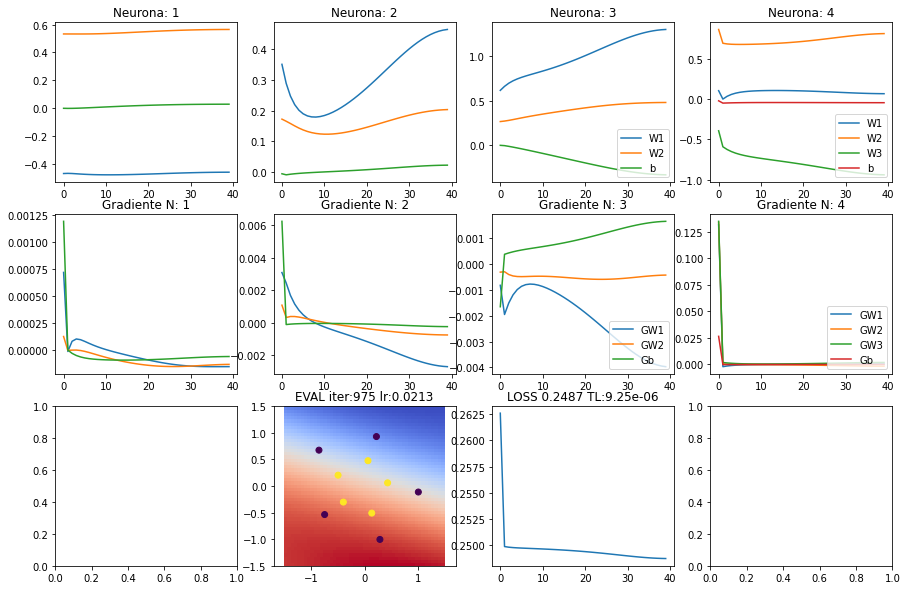

In [ ]:
#@title GRAFICA x NEURONA y GRADIENTE proceso de RE-entrenamiento a partir de pesos optimos alterados
import time
from IPython.display import clear_output

CONTINUAR = False   # primer ciclo o continuacion

#random.seed(777)
#topologia = [p, 4, 8, 1]
#red = crea_nn(topologia, sigm)

#print(red.shape)
#red = []
#red.append(capa_neuronal(2, 4, sigm, 5))
#red.append(capa_neuronal(4, 8, sigm, 3))
#red.append(capa_neuronal(8, 1, sigm, 10))

#random.seed(888)

topologia = [p, 3, 1]
if(CONTINUAR!=True): red = crea_nn(topologia, sigm)

"""
WL1 = np.array([[ 8.84243203,  2.1386732 ,  2.94748844],   [ 0.78027067,  4.12606739, -4.23355456]])
#WL1 = np.array([[ 1,  2.1386732 ,  2.94748844],   [ 0.78027067,  4.12606739, -4.23355456]])

bL1 = np.array([[ 3.7654632 , -3.25091011, -2.91781571]])
#bL1 = np.array([[ -2 , -3.25091011, -2.91781571]])

WL2 = np.array([[ 14.3519784 ],  [-18.93268329],  [-17.98428509]])
#WL2 = np.array([[ 3.3519784 ],  [-18.93268329],  [-17.98428509]])

bL2 = np.array([[-2.53003652]])
bL2 = np.array([[0.53003652]])

red[0].W, red[0].b = WL1, bL1
red[1].W, red[1].b = WL2, bL2
"""

if(CONTINUAR!=True): red[0].snapshot()
if(CONTINUAR!=True): red[1].snapshot()

#red[0].rollback()
#red[1].rollback()


lr = LR = 0.85
iter = 1000
TL = 0

if(CONTINUAR!=True): loss = []
if(CONTINUAR!=True): frames = []

if(CONTINUAR!=True): L1 = []
if(CONTINUAR!=True): L2 = []


if(CONTINUAR!=True):
  W1 = []
  W2 = []
  W3 = []
  W4 = []
  W5 = []
  W6 = []
  W7 = []
  W8 = []
  W9 = []
  B1 = []
  B2 = []
  B3 = []
  B4 = []


  GW1 = []
  GW2 = []
  GW3 = []
  GW4 = []
  GW5 = []
  GW6 = []
  GW7 = []
  GW8 = []
  GW9 = []
  GB1 = []
  GB2 = []
  GB3 = []
  GB4 = []


for i in range(iter):
  if(TL<1e-3): lr = LR * (1-i/iter)
  Py = train(red, X_coord, Y_class, l2_cost, lr)     # entrenamiento


  if i%25 ==0:
    loss.append(l2_cost[0](Py, Y_class))      # LOSS del entrenamiento

    #L1.append(red[0].backup())
    #L2.append(red[1].backup())

    #EVAL
    res = 50
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)
    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(red, np.array([[x0, x1]]), Y_class, l2_cost, train=False)[0,0]   # verificacion

    #PESOS W y B
    layer = red[0]
    W1.append(layer.W[0][0])
    W2.append(layer.W[1][0])
    B1.append(layer.b[0][0])

    W3.append(layer.W[0][1])
    W4.append(layer.W[1][1])
    B2.append(layer.b[0][1])

    W5.append(layer.W[0][2])
    W6.append(layer.W[1][2])
    B3.append(layer.b[0][2])

    layer = red[1]
    W7.append(layer.W[0][0])
    W8.append(layer.W[1][0])
    W9.append(layer.W[2][0])
    B4.append(layer.b[0][0])


    # GRADIENTES
    layer = red[0]
    GW1.append(layer.grad_W[0][0])
    GW2.append(layer.grad_W[1][0])
    GB1.append(layer.grad_b[0][0])

    GW3.append(layer.grad_W[0][1])
    GW4.append(layer.grad_W[1][1])
    GB2.append(layer.grad_b[0][1])

    GW5.append(layer.grad_W[0][2])
    GW6.append(layer.grad_W[1][2])
    GB3.append(layer.grad_b[0][2])

    layer = red[1]
    GW7.append(layer.grad_W[0][0])
    GW8.append(layer.grad_W[1][0])
    GW9.append(layer.grad_W[2][0])
    GB4.append(layer.grad_b[0][0])


    # IMPRIME GRAFICO
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
    clear_output(wait=True)


    # IMPRIME NEURONAS
    ax[0,0].set_title("Neurona: 1")
    ax[0,0].plot(W1, label='W1')
    ax[0,0].plot(W2, label='W2')
    ax[0,0].plot(B1, label='b1')

    ax[0,1].set_title("Neurona: 2")
    ax[0,1].plot(W3, label='W3')
    ax[0,1].plot(W4, label='W4')
    ax[0,1].plot(B2, label='b2')

    ax[0,2].set_title("Neurona: 3")
    ax[0,2].plot(W5, label='W1')
    ax[0,2].plot(W6, label='W2')
    ax[0,2].plot(B3, label='b')
    ax[0,2].legend(loc='lower right')

    ax[0,3].set_title("Neurona: 4")
    ax[0,3].plot(W7, label='W1')
    ax[0,3].plot(W8, label='W2')
    ax[0,3].plot(W9, label='W3')
    ax[0,3].plot(B4, label='b')
    ax[0,3].legend(loc='lower right')


    # IMPRIME GRADIENTES
    ax[1,0].set_title("Gradiente N: 1")
    ax[1,0].plot(GW1, label='W1')
    ax[1,0].plot(GW2, label='W2')
    ax[1,0].plot(GB1, label='b1')

    ax[1,1].set_title("Gradiente N: 2")
    ax[1,1].plot(GW3, label='W3')
    ax[1,1].plot(GW4, label='W4')
    ax[1,1].plot(GB2, label='b2')

    ax[1,2].set_title("Gradiente N: 3")
    ax[1,2].plot(GW5, label='GW1')
    ax[1,2].plot(GW6, label='GW2')
    ax[1,2].plot(GB3, label='Gb')
    ax[1,2].legend(loc='lower right')

    ax[1,3].set_title("Gradiente N: 4")
    ax[1,3].plot(GW7, label='GW1')
    ax[1,3].plot(GW8, label='GW2')
    ax[1,3].plot(GW9, label='GW3')
    ax[1,3].plot(GB4, label='Gb')
    ax[1,3].legend(loc='lower right')



    ax[2,1].set_title(f'EVAL iter:{i} lr:{lr:.4f}')
    ax[2,1].pcolormesh(_x0, _x1, _Y, cmap="coolwarm")           # imprime la malla de resultados de la verificacion
    ax[2,1].axis("equal")

    #plt.scatter(X_coord[:,0], X_coord[:,1], c=Y_class)
    ax[2,1].scatter(X_coord[:,0], X_coord[:,1], c=Y_class)      # imprime los puntos

    #plt.show()
    TL = loss[-2]-loss[-1] if i>50 else 0
    ax[2,2].set_title(f'LOSS {loss[-1]:.4f} TL:{TL:.2e}')
    ax[2,2].plot(range(len(loss)), loss)                        # imprime el loss
    #plt.show()

    
    # FRAMES PARA VIDEO
    figu = plt.gcf()
    figu.canvas.draw()
    image = np.frombuffer(figu.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(figu.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)
    

    plt.show()

    #time.sleep(1)

# Muestra el video
#media.show_video(frames, fps=3)

In [ ]:
red[0].W = L1[0].W.copy()
red[0].b = L1[0].b.copy()
red[1].W = L2[0].W.copy()
red[1].b = L2[0].b.copy()


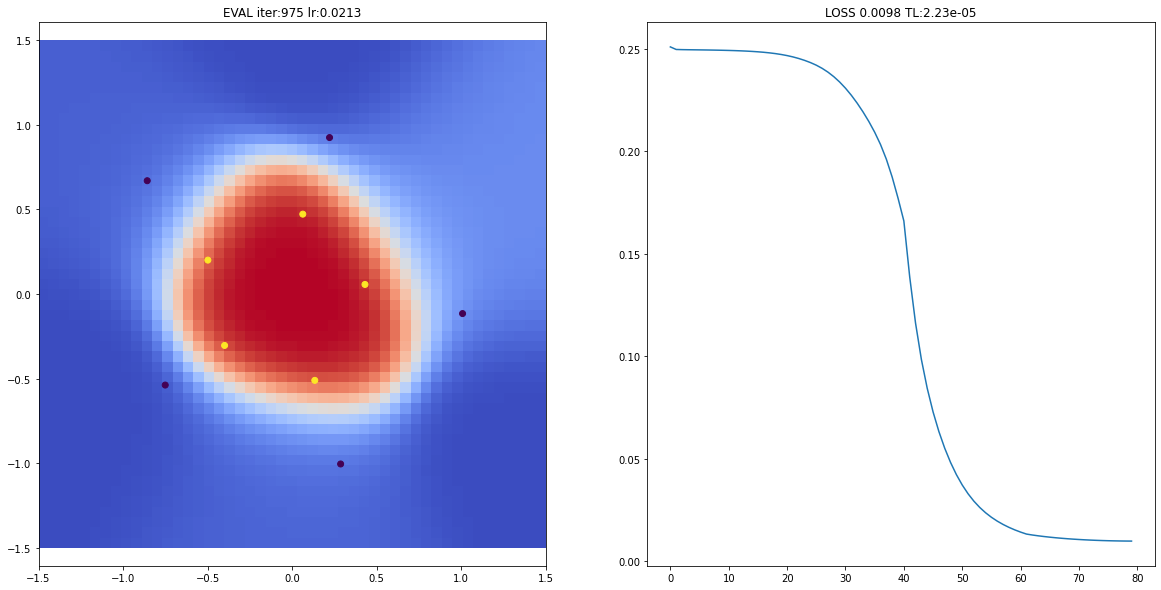

In [ ]:
#@title  SIN GRAFICA pero con BCKP proceso de entrenamiento a partir de pesos optimos alterados
import time
from IPython.display import clear_output

CONTINUAR = True   # primer ciclo o continuacion

#random.seed(777)
#topologia = [p, 4, 8, 1]
#red = crea_nn(topologia, sigm)

#print(red.shape)
#red = []
#red.append(capa_neuronal(2, 4, sigm, 5))
#red.append(capa_neuronal(4, 8, sigm, 3))
#red.append(capa_neuronal(8, 1, sigm, 10))

#random.seed(888)

topologia = [p, 3, 1]
if(CONTINUAR!=True): red = crea_nn(topologia, sigm)

"""
WL1 = np.array([[ 8.84243203,  2.1386732 ,  2.94748844],   [ 0.78027067,  4.12606739, -4.23355456]])
#WL1 = np.array([[ 1,  2.1386732 ,  2.94748844],   [ 0.78027067,  4.12606739, -4.23355456]])

bL1 = np.array([[ 3.7654632 , -3.25091011, -2.91781571]])
#bL1 = np.array([[ -2 , -3.25091011, -2.91781571]])

WL2 = np.array([[ 14.3519784 ],  [-18.93268329],  [-17.98428509]])
#WL2 = np.array([[ 3.3519784 ],  [-18.93268329],  [-17.98428509]])

bL2 = np.array([[-2.53003652]])
bL2 = np.array([[0.53003652]])

red[0].W, red[0].b = WL1, bL1
red[1].W, red[1].b = WL2, bL2
"""

if(CONTINUAR!=True): red[0].snapshot()
if(CONTINUAR!=True): red[1].snapshot()

#red[0].rollback()
#red[1].rollback()


lr = LR = 0.85
iter = 1000
TL = 0

if(CONTINUAR!=True): loss = []
if(CONTINUAR!=True): Res = []
if(CONTINUAR!=True): lr_ = []
if(CONTINUAR!=True): frames = []

if(CONTINUAR!=True): L1 = []
if(CONTINUAR!=True): L2 = []


for i in range(iter):
  if(TL<1e-3): lr = LR * (1-i/iter)
  Py = train(red, X_coord, Y_class, l2_cost, lr)     # entrenamiento


  if i%25 ==0:
    lr_.append(lr)      # Lr del entrenamiento
    loss.append(l2_cost[0](Py, Y_class))      # LOSS del entrenamiento

    # respaldo acumulado
    L1.append(red[0].backup())
    L2.append(red[1].backup())

    #EVAL
    res = 50
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)
    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(red, np.array([[x0, x1]]), Y_class, l2_cost, train=False)[0,0]   # verificacion
    Res.append(_Y)      # Res del entrenamiento


    # IMPRIME GRAFICO
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    clear_output(wait=True)

    ax[0].set_title(f'EVAL iter:{i} lr:{lr:.4f}')
    ax[0].pcolormesh(_x0, _x1, _Y, cmap="coolwarm")           # imprime la malla de resultados de la verificacion
    ax[0].axis("equal")

    #plt.scatter(X_coord[:,0], X_coord[:,1], c=Y_class)
    ax[0].scatter(X_coord[:,0], X_coord[:,1], c=Y_class)      # imprime los puntos

    #plt.show()
    TL = loss[-2]-loss[-1] if i>50 else 0
    ax[1].set_title(f'LOSS {loss[-1]:.4f} TL:{TL:.2e}')
    ax[1].plot(range(len(loss)), loss)                        # imprime el loss
    #plt.show()

    """    
    # FRAMES PARA VIDEO
    figu = plt.gcf()
    figu.canvas.draw()
    image = np.frombuffer(figu.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(figu.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)
    """

    plt.show()

    #time.sleep(1)

# Muestra el video
#media.show_video(frames, fps=3)

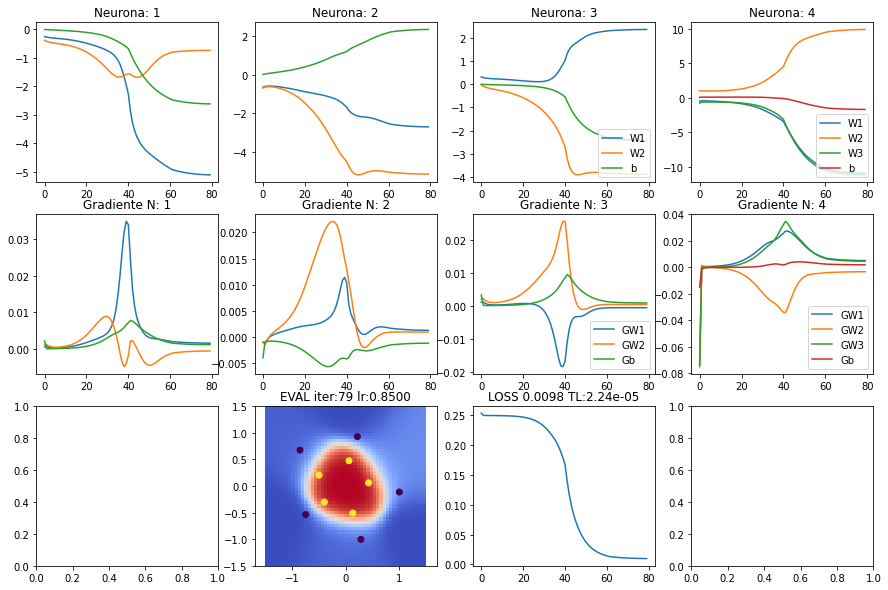

In [ ]:
#@title  SOLO GRAFICA FINAL DEL HISTORIAL DESDE  BCKP 
import time
from IPython.display import clear_output

#CONTINUAR = True   # primer ciclo o continuacion

#topologia = [p, 3, 1]
#if(CONTINUAR!=True): red = crea_nn(topologia, sigm)

#if(CONTINUAR!=True): red[0].snapshot()
#if(CONTINUAR!=True): red[1].snapshot()

lr = LR = 0.85
iter = 1000
TL = 0

#if(CONTINUAR!=True): loss = []
#if(CONTINUAR!=True): 
frames = []

#if(CONTINUAR!=True): L1 = []
#if(CONTINUAR!=True): L2 = []


#if(CONTINUAR!=True):
W1 = []
W2 = []
W3 = []
W4 = []
W5 = []
W6 = []
W7 = []
W8 = []
W9 = []
B1 = []
B2 = []
B3 = []
B4 = []


GW1 = []
GW2 = []
GW3 = []
GW4 = []
GW5 = []
GW6 = []
GW7 = []
GW8 = []
GW9 = []
GB1 = []
GB2 = []
GB3 = []
GB4 = []


for i, layer in enumerate(L1):
    #PESOS W y B
    #layer = red[0]
    W1.append(layer.W[0][0])
    W2.append(layer.W[1][0])
    B1.append(layer.b[0][0])

    W3.append(layer.W[0][1])
    W4.append(layer.W[1][1])
    B2.append(layer.b[0][1])

    W5.append(layer.W[0][2])
    W6.append(layer.W[1][2])
    B3.append(layer.b[0][2])

    # GRADIENTES
    #layer = red[0]
    GW1.append(layer.grad_W[0][0])
    GW2.append(layer.grad_W[1][0])
    GB1.append(layer.grad_b[0][0])

    GW3.append(layer.grad_W[0][1])
    GW4.append(layer.grad_W[1][1])
    GB2.append(layer.grad_b[0][1])

    GW5.append(layer.grad_W[0][2])
    GW6.append(layer.grad_W[1][2])
    GB3.append(layer.grad_b[0][2])

for i, layer in enumerate(L2):
    #layer = red[1]
    W7.append(layer.W[0][0])
    W8.append(layer.W[1][0])
    W9.append(layer.W[2][0])
    B4.append(layer.b[0][0])

    #layer = red[1]
    GW7.append(layer.grad_W[0][0])
    GW8.append(layer.grad_W[1][0])
    GW9.append(layer.grad_W[2][0])
    GB4.append(layer.grad_b[0][0])


# IMPRIME GRAFICO
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
clear_output(wait=True)


# IMPRIME NEURONAS
ax[0,0].set_title("Neurona: 1")
ax[0,0].plot(W1, label='W1')
ax[0,0].plot(W2, label='W2')
ax[0,0].plot(B1, label='b1')

ax[0,1].set_title("Neurona: 2")
ax[0,1].plot(W3, label='W3')
ax[0,1].plot(W4, label='W4')
ax[0,1].plot(B2, label='b2')

ax[0,2].set_title("Neurona: 3")
ax[0,2].plot(W5, label='W1')
ax[0,2].plot(W6, label='W2')
ax[0,2].plot(B3, label='b')
ax[0,2].legend(loc='lower right')

ax[0,3].set_title("Neurona: 4")
ax[0,3].plot(W7, label='W1')
ax[0,3].plot(W8, label='W2')
ax[0,3].plot(W9, label='W3')
ax[0,3].plot(B4, label='b')
ax[0,3].legend(loc='lower right')


# IMPRIME GRADIENTES
ax[1,0].set_title("Gradiente N: 1")
ax[1,0].plot(GW1, label='W1')
ax[1,0].plot(GW2, label='W2')
ax[1,0].plot(GB1, label='b1')

ax[1,1].set_title("Gradiente N: 2")
ax[1,1].plot(GW3, label='W3')
ax[1,1].plot(GW4, label='W4')
ax[1,1].plot(GB2, label='b2')

ax[1,2].set_title("Gradiente N: 3")
ax[1,2].plot(GW5, label='GW1')
ax[1,2].plot(GW6, label='GW2')
ax[1,2].plot(GB3, label='Gb')
ax[1,2].legend(loc='lower right')

ax[1,3].set_title("Gradiente N: 4")
ax[1,3].plot(GW7, label='GW1')
ax[1,3].plot(GW8, label='GW2')
ax[1,3].plot(GW9, label='GW3')
ax[1,3].plot(GB4, label='Gb')
ax[1,3].legend(loc='lower right')


#EVAL
res = 50
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)
_Y = np.zeros((res, res))

for i0, x0 in enumerate(_x0):
  for i1, x1 in enumerate(_x1):
    _Y[i0, i1] = train(red, np.array([[x0, x1]]), Y_class, l2_cost, train=False)[0,0]   # verificacion

ax[2,1].set_title(f'EVAL iter:{i} lr:{lr:.4f}')
ax[2,1].pcolormesh(_x0, _x1, _Y, cmap="coolwarm")           # imprime la malla de resultados de la verificacion
ax[2,1].axis("equal")

#plt.scatter(X_coord[:,0], X_coord[:,1], c=Y_class)
ax[2,1].scatter(X_coord[:,0], X_coord[:,1], c=Y_class)      # imprime los puntos

#plt.show()
TL = loss[-2]-loss[-1] if i>50 else 0
ax[2,2].set_title(f'LOSS {loss[-1]:.4f} TL:{TL:.2e}')
ax[2,2].plot(range(len(loss)), loss)                        # imprime el loss
#plt.show()

"""
# FRAMES PARA VIDEO
figu = plt.gcf()
figu.canvas.draw()
image = np.frombuffer(figu.canvas.tostring_rgb(), dtype='uint8')
image = image.reshape(figu.canvas.get_width_height()[::-1] + (3,))
frames.append(image)
"""

plt.show()

#time.sleep(1)

# Muestra el video
#media.show_video(frames, fps=3)

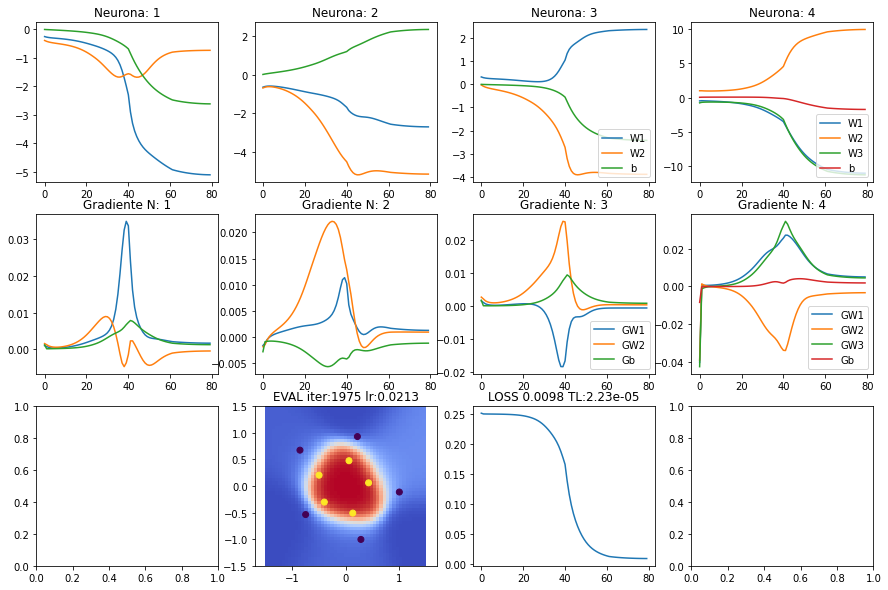

In [ ]:
#@title  SOLO GRAFICA VIDEO DEL HISTORIAL DESDE  BCKP 
import time
from IPython.display import clear_output

#CONTINUAR = True   # primer ciclo o continuacion

#topologia = [p, 3, 1]
#if(CONTINUAR!=True): red = crea_nn(topologia, sigm)

#if(CONTINUAR!=True): red[0].snapshot()
#if(CONTINUAR!=True): red[1].snapshot()

lr = LR = 0.85
iter = 1000
TL = 0

#if(CONTINUAR!=True): loss = []
#if(CONTINUAR!=True): 
frames = []

#if(CONTINUAR!=True): L1 = []
#if(CONTINUAR!=True): L2 = []

#EVAL
res = 50
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)
#_Y = np.zeros((res, res))


#if(CONTINUAR!=True):
W1 = []
W2 = []
W3 = []
W4 = []
W5 = []
W6 = []
W7 = []
W8 = []
W9 = []
B1 = []
B2 = []
B3 = []
B4 = []


GW1 = []
GW2 = []
GW3 = []
GW4 = []
GW5 = []
GW6 = []
GW7 = []
GW8 = []
GW9 = []
GB1 = []
GB2 = []
GB3 = []
GB4 = []

#CICLO j PARA VIDEO
for j, layer in enumerate(L1):

  #for i, layer in enumerate(L1[j]):
  #PESOS W y B
  layer = L1[j]
  W1.append(layer.W[0][0])
  W2.append(layer.W[1][0])
  B1.append(layer.b[0][0])

  W3.append(layer.W[0][1])
  W4.append(layer.W[1][1])
  B2.append(layer.b[0][1])

  W5.append(layer.W[0][2])
  W6.append(layer.W[1][2])
  B3.append(layer.b[0][2])

  # GRADIENTES
  #layer = red[0]
  GW1.append(layer.grad_W[0][0])
  GW2.append(layer.grad_W[1][0])
  GB1.append(layer.grad_b[0][0])

  GW3.append(layer.grad_W[0][1])
  GW4.append(layer.grad_W[1][1])
  GB2.append(layer.grad_b[0][1])

  GW5.append(layer.grad_W[0][2])
  GW6.append(layer.grad_W[1][2])
  GB3.append(layer.grad_b[0][2])

  #for i, layer in enumerate(L2[j]):
  layer = L2[j]
  W7.append(layer.W[0][0])
  W8.append(layer.W[1][0])
  W9.append(layer.W[2][0])
  B4.append(layer.b[0][0])

  #layer = red[1]
  GW7.append(layer.grad_W[0][0])
  GW8.append(layer.grad_W[1][0])
  GW9.append(layer.grad_W[2][0])
  GB4.append(layer.grad_b[0][0])


  # IMPRIME GRAFICO
  fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
  clear_output(wait=True)


  # IMPRIME NEURONAS
  ax[0,0].set_title("Neurona: 1")
  ax[0,0].plot(W1, label='W1')
  ax[0,0].plot(W2, label='W2')
  ax[0,0].plot(B1, label='b1')

  ax[0,1].set_title("Neurona: 2")
  ax[0,1].plot(W3, label='W3')
  ax[0,1].plot(W4, label='W4')
  ax[0,1].plot(B2, label='b2')

  ax[0,2].set_title("Neurona: 3")
  ax[0,2].plot(W5, label='W1')
  ax[0,2].plot(W6, label='W2')
  ax[0,2].plot(B3, label='b')
  ax[0,2].legend(loc='lower right')

  ax[0,3].set_title("Neurona: 4")
  ax[0,3].plot(W7, label='W1')
  ax[0,3].plot(W8, label='W2')
  ax[0,3].plot(W9, label='W3')
  ax[0,3].plot(B4, label='b')
  ax[0,3].legend(loc='lower right')


  # IMPRIME GRADIENTES
  ax[1,0].set_title("Gradiente N: 1")
  ax[1,0].plot(GW1, label='W1')
  ax[1,0].plot(GW2, label='W2')
  ax[1,0].plot(GB1, label='b1')

  ax[1,1].set_title("Gradiente N: 2")
  ax[1,1].plot(GW3, label='W3')
  ax[1,1].plot(GW4, label='W4')
  ax[1,1].plot(GB2, label='b2')

  ax[1,2].set_title("Gradiente N: 3")
  ax[1,2].plot(GW5, label='GW1')
  ax[1,2].plot(GW6, label='GW2')
  ax[1,2].plot(GB3, label='Gb')
  ax[1,2].legend(loc='lower right')

  ax[1,3].set_title("Gradiente N: 4")
  ax[1,3].plot(GW7, label='GW1')
  ax[1,3].plot(GW8, label='GW2')
  ax[1,3].plot(GW9, label='GW3')
  ax[1,3].plot(GB4, label='Gb')
  ax[1,3].legend(loc='lower right')



  #for i0, x0 in enumerate(R):
  #  for i0, x0 in enumerate(_x0):
  #    for i1, x1 in enumerate(_x1):
  #      #_Y[i0, i1] = train(red, np.array([[x0, x1]]), Y_class, l2_cost, train=False)[0,0]   # verificacion

  ax[2,1].set_title(f'EVAL iter:{j*25} lr:{lr_[j]:.4f}')
  ax[2,1].pcolormesh(_x0, _x1, Res[j], cmap="coolwarm")           # imprime la malla de resultados de la verificacion
  ax[2,1].axis("equal")

  #plt.scatter(X_coord[:,0], X_coord[:,1], c=Y_class)
  ax[2,1].scatter(X_coord[:,0], X_coord[:,1], c=Y_class)      # imprime los puntos

  #plt.show()
  TL = loss[j-1]-loss[j] if j>1 else 0
  ax[2,2].set_title(f'LOSS {loss[j]:.4f} TL:{TL:.2e}')
  ax[2,2].plot(range(len(loss[:j+1])), loss[:j+1])                        # imprime el loss
  #plt.show()

  
  # FRAMES PARA VIDEO
  figu = plt.gcf()
  figu.canvas.draw()
  image = np.frombuffer(figu.canvas.tostring_rgb(), dtype='uint8')
  image = image.reshape(figu.canvas.get_width_height()[::-1] + (3,))
  frames.append(image)
  

  plt.show()

  #time.sleep(1)

# Muestra el video
media.show_video(frames, fps=3)

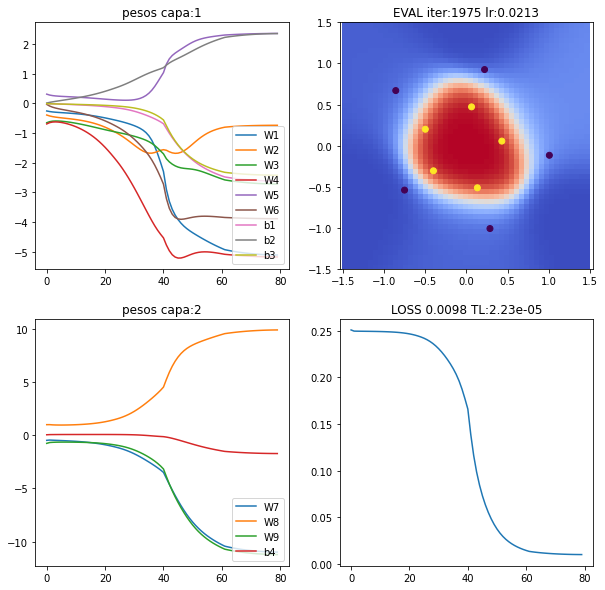

In [ ]:
#@title  SOLO GRAFICA VIDEO DEL HISTORIAL DESDE  BCKP 
import time
from IPython.display import clear_output

#CONTINUAR = True   # primer ciclo o continuacion

#topologia = [p, 3, 1]
#if(CONTINUAR!=True): red = crea_nn(topologia, sigm)

#if(CONTINUAR!=True): red[0].snapshot()
#if(CONTINUAR!=True): red[1].snapshot()

lr = LR = 0.85
iter = 1000
TL = 0

#if(CONTINUAR!=True): loss = []
#if(CONTINUAR!=True): 
frames = []

#if(CONTINUAR!=True): L1 = []
#if(CONTINUAR!=True): L2 = []

#EVAL
res = 50
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)
#_Y = np.zeros((res, res))


#if(CONTINUAR!=True):
W1 = []
W2 = []
W3 = []
W4 = []
W5 = []
W6 = []
W7 = []
W8 = []
W9 = []
B1 = []
B2 = []
B3 = []
B4 = []


GW1 = []
GW2 = []
GW3 = []
GW4 = []
GW5 = []
GW6 = []
GW7 = []
GW8 = []
GW9 = []
GB1 = []
GB2 = []
GB3 = []
GB4 = []

#CICLO j PARA VIDEO
for j, layer in enumerate(L1):
  #for i, layer in enumerate(L1[j]):
  #PESOS W y B
  layer = L1[j]
  W1.append(layer.W[0][0])
  W2.append(layer.W[1][0])
  B1.append(layer.b[0][0])

  W3.append(layer.W[0][1])
  W4.append(layer.W[1][1])
  B2.append(layer.b[0][1])

  W5.append(layer.W[0][2])
  W6.append(layer.W[1][2])
  B3.append(layer.b[0][2])

  # GRADIENTES
  #layer = red[0]
  GW1.append(layer.grad_W[0][0])
  GW2.append(layer.grad_W[1][0])
  GB1.append(layer.grad_b[0][0])

  GW3.append(layer.grad_W[0][1])
  GW4.append(layer.grad_W[1][1])
  GB2.append(layer.grad_b[0][1])

  GW5.append(layer.grad_W[0][2])
  GW6.append(layer.grad_W[1][2])
  GB3.append(layer.grad_b[0][2])

  #for i, layer in enumerate(L2[j]):
  layer = L2[j]
  W7.append(layer.W[0][0])
  W8.append(layer.W[1][0])
  W9.append(layer.W[2][0])
  B4.append(layer.b[0][0])

  #layer = red[1]
  GW7.append(layer.grad_W[0][0])
  GW8.append(layer.grad_W[1][0])
  GW9.append(layer.grad_W[2][0])
  GB4.append(layer.grad_b[0][0])



  # IMPRIME GRAFICO
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
  clear_output(wait=True)


  ax[0,0].set_title("pesos capa:1")
  ax[0,0].plot(W1, label='W1')
  ax[0,0].plot(W2, label='W2')
  ax[0,0].plot(W3, label='W3')
  ax[0,0].plot(W4, label='W4')
  ax[0,0].plot(W5, label='W5')
  ax[0,0].plot(W6, label='W6')
  ax[0,0].plot(B1, label='b1')
  ax[0,0].plot(B2, label='b2')
  ax[0,0].plot(B3, label='b3')
  ax[0,0].legend(loc='lower right')

  ax[1,0].set_title("pesos capa:2")
  ax[1,0].plot(W7, label='W7')
  ax[1,0].plot(W8, label='W8')
  ax[1,0].plot(W9, label='W9')
  ax[1,0].plot(B4, label='b4')
  ax[1,0].legend(loc='lower right')


  ax[0,1].set_title(f'EVAL iter:{j*25} lr:{lr_[j]:.4f}')
  ax[0,1].pcolormesh(_x0, _x1, Res[j], cmap="coolwarm")           # imprime la malla de resultados de la verificacion
  ax[0,1].axis("equal")

  ax[0,1].scatter(X_coord[:,0], X_coord[:,1], c=Y_class)      # imprime los puntos

  TL = loss[j-1]-loss[j] if j>1 else 0
  ax[1,1].set_title(f'LOSS {loss[j]:.4f} TL:{TL:.2e}')
  ax[1,1].plot(range(len(loss[:j+1])), loss[:j+1])                        # imprime el loss


  
  # FRAMES PARA VIDEO
  figu = plt.gcf()
  figu.canvas.draw()
  image = np.frombuffer(figu.canvas.tostring_rgb(), dtype='uint8')
  image = image.reshape(figu.canvas.get_width_height()[::-1] + (3,))
  frames.append(image)
  

  plt.show()

# Muestra el video
media.show_video(frames, fps=3)

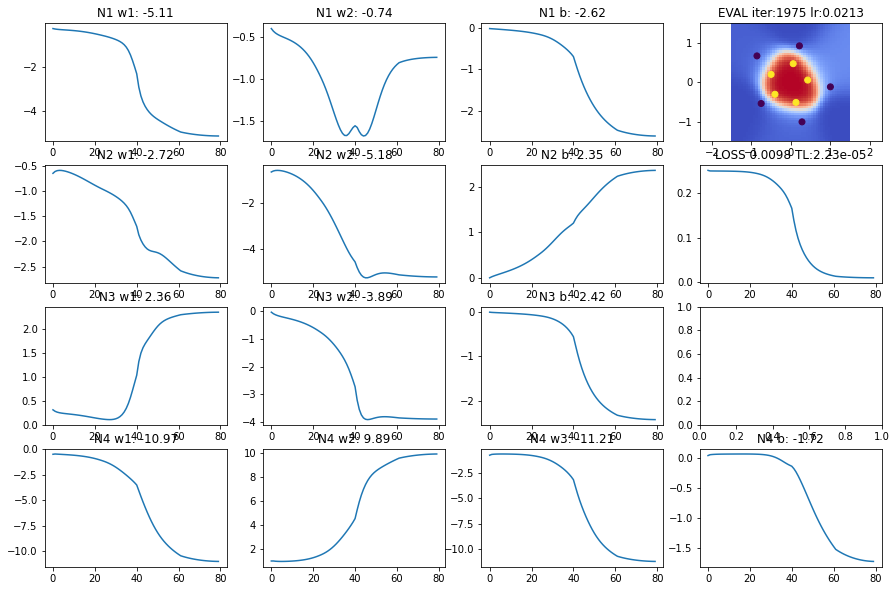

In [ ]:
#@title  SOLO GRAFICA VIDEO DEL HISTORIAL DESDE  BCKP 
import time
from IPython.display import clear_output

#CONTINUAR = True   # primer ciclo o continuacion

#topologia = [p, 3, 1]
#if(CONTINUAR!=True): red = crea_nn(topologia, sigm)

#if(CONTINUAR!=True): red[0].snapshot()
#if(CONTINUAR!=True): red[1].snapshot()

lr = LR = 0.85
iter = 1000
TL = 0

#if(CONTINUAR!=True): loss = []
#if(CONTINUAR!=True): 
frames = []

#if(CONTINUAR!=True): L1 = []
#if(CONTINUAR!=True): L2 = []

#EVAL
res = 50
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)
#_Y = np.zeros((res, res))


#if(CONTINUAR!=True):
W1 = []
W2 = []
W3 = []
W4 = []
W5 = []
W6 = []
W7 = []
W8 = []
W9 = []
B1 = []
B2 = []
B3 = []
B4 = []


GW1 = []
GW2 = []
GW3 = []
GW4 = []
GW5 = []
GW6 = []
GW7 = []
GW8 = []
GW9 = []
GB1 = []
GB2 = []
GB3 = []
GB4 = []

#CICLO j PARA VIDEO
for j, layer in enumerate(L1):
  #for i, layer in enumerate(L1[j]):
  #PESOS W y B
  layer = L1[j]
  W1.append(layer.W[0][0])
  W2.append(layer.W[1][0])
  B1.append(layer.b[0][0])

  W3.append(layer.W[0][1])
  W4.append(layer.W[1][1])
  B2.append(layer.b[0][1])

  W5.append(layer.W[0][2])
  W6.append(layer.W[1][2])
  B3.append(layer.b[0][2])

  # GRADIENTES
  #layer = red[0]
  GW1.append(layer.grad_W[0][0])
  GW2.append(layer.grad_W[1][0])
  GB1.append(layer.grad_b[0][0])

  GW3.append(layer.grad_W[0][1])
  GW4.append(layer.grad_W[1][1])
  GB2.append(layer.grad_b[0][1])

  GW5.append(layer.grad_W[0][2])
  GW6.append(layer.grad_W[1][2])
  GB3.append(layer.grad_b[0][2])

  #for i, layer in enumerate(L2[j]):
  layer = L2[j]
  W7.append(layer.W[0][0])
  W8.append(layer.W[1][0])
  W9.append(layer.W[2][0])
  B4.append(layer.b[0][0])

  #layer = red[1]
  GW7.append(layer.grad_W[0][0])
  GW8.append(layer.grad_W[1][0])
  GW9.append(layer.grad_W[2][0])
  GB4.append(layer.grad_b[0][0])



  # IMPRIME GRAFICO
  fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))
  clear_output(wait=True)

  ax[0,0].set_title(f"N1 w1: {W1[-1]:.2f}")
  ax[0,0].plot(W1, label='W1')
  ax[0,1].set_title(f"N1 w2: {W2[-1]:.2f}")
  ax[0,1].plot(W2, label='W2')
  ax[0,2].set_title(f"N1 b: {B1[-1]:.2f}")
  ax[0,2].plot(B1, label='b1')

  ax[1,0].set_title(f"N2 w1: {W3[-1]:.2f}")
  ax[1,0].plot(W3, label='W3')
  ax[1,1].set_title(f"N2 w2: {W4[-1]:.2f}")
  ax[1,1].plot(W4, label='W4')
  ax[1,2].set_title(f"N2 b: {B2[-1]:.2f}")
  ax[1,2].plot(B2, label='b2')

  ax[2,0].set_title(f"N3 w1: {W5[-1]:.2f}")
  ax[2,0].plot(W5, label='W5')
  ax[2,1].set_title(f"N3 w2: {W6[-1]:.2f}")
  ax[2,1].plot(W6, label='W6')
  ax[2,2].set_title(f"N3 b: {B3[-1]:.2f}")
  ax[2,2].plot(B3, label='b3')

  ax[3,0].set_title(f"N4 w1: {W7[-1]:.2f}")
  ax[3,0].plot(W7, label='W7')
  ax[3,1].set_title(f"N4 w2: {W8[-1]:.2f}")
  ax[3,1].plot(W8, label='W8')
  ax[3,2].set_title(f"N4 w3: {W9[-1]:.2f}")
  ax[3,2].plot(W9, label='W9')
  ax[3,3].set_title(f"N4 b: {B4[-1]:.2f}")
  ax[3,3].plot(B4, label='b4')

  ax[0,3].set_title(f'EVAL iter:{j*25} lr:{lr_[j]:.4f}')
  ax[0,3].pcolormesh(_x0, _x1, Res[j], cmap="coolwarm")           # imprime la malla de resultados de la verificacion
  ax[0,3].axis("equal")

  ax[0,3].scatter(X_coord[:,0], X_coord[:,1], c=Y_class)      # imprime los puntos

  TL = loss[j-1]-loss[j] if j>1 else 0
  ax[1,3].set_title(f'LOSS {loss[j]:.4f} TL:{TL:.2e}')
  ax[1,3].plot(range(len(loss[:j+1])), loss[:j+1])                        # imprime el loss



  # FRAMES PARA VIDEO
  figu = plt.gcf()
  figu.canvas.draw()
  image = np.frombuffer(figu.canvas.tostring_rgb(), dtype='uint8')
  image = image.reshape(figu.canvas.get_width_height()[::-1] + (3,))
  frames.append(image)
  

  plt.show()

# Muestra el video
media.show_video(frames, fps=3)

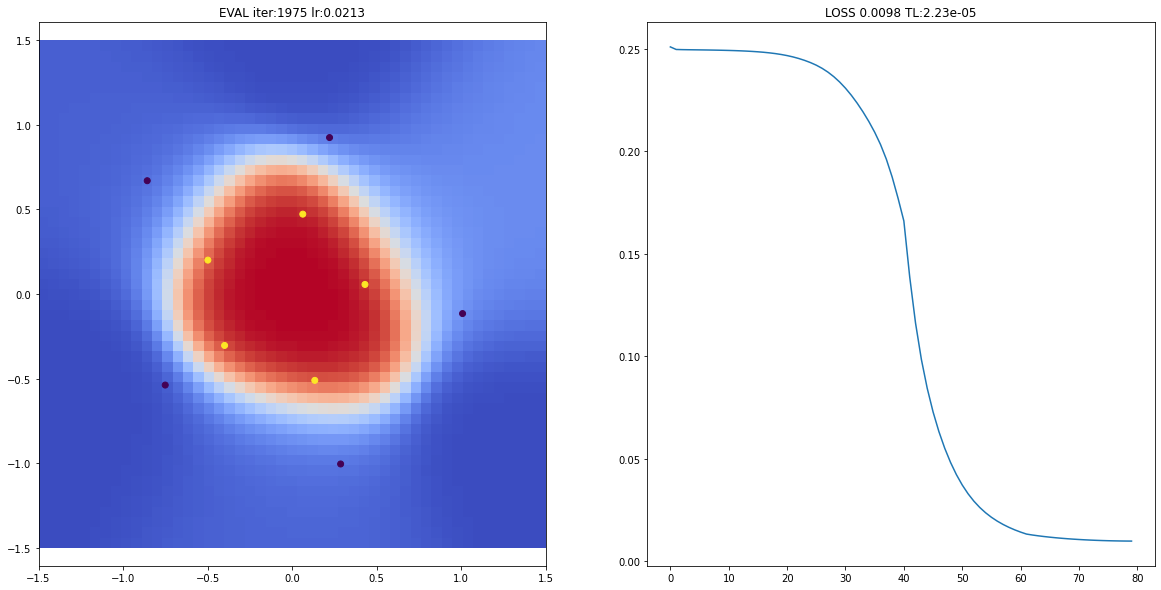

In [ ]:
#@title  SOLO GRAFICA VIDEO DEL HISTORIAL DESDE  BCKP 
import time
from IPython.display import clear_output

#CONTINUAR = True   # primer ciclo o continuacion

#topologia = [p, 3, 1]
#if(CONTINUAR!=True): red = crea_nn(topologia, sigm)

#if(CONTINUAR!=True): red[0].snapshot()
#if(CONTINUAR!=True): red[1].snapshot()

lr = LR = 0.85
iter = 1000
TL = 0

#if(CONTINUAR!=True): loss = []
#if(CONTINUAR!=True): 
frames = []

#if(CONTINUAR!=True): L1 = []
#if(CONTINUAR!=True): L2 = []

#EVAL
res = 50
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)
#_Y = np.zeros((res, res))


#if(CONTINUAR!=True):
W1 = []
W2 = []
W3 = []
W4 = []
W5 = []
W6 = []
W7 = []
W8 = []
W9 = []
B1 = []
B2 = []
B3 = []
B4 = []


GW1 = []
GW2 = []
GW3 = []
GW4 = []
GW5 = []
GW6 = []
GW7 = []
GW8 = []
GW9 = []
GB1 = []
GB2 = []
GB3 = []
GB4 = []

#CICLO j PARA VIDEO
for j, layer in enumerate(L1):
  #for i, layer in enumerate(L1[j]):
  #PESOS W y B
  layer = L1[j]
  W1.append(layer.W[0][0])
  W2.append(layer.W[1][0])
  B1.append(layer.b[0][0])

  W3.append(layer.W[0][1])
  W4.append(layer.W[1][1])
  B2.append(layer.b[0][1])

  W5.append(layer.W[0][2])
  W6.append(layer.W[1][2])
  B3.append(layer.b[0][2])

  # GRADIENTES
  #layer = red[0]
  GW1.append(layer.grad_W[0][0])
  GW2.append(layer.grad_W[1][0])
  GB1.append(layer.grad_b[0][0])

  GW3.append(layer.grad_W[0][1])
  GW4.append(layer.grad_W[1][1])
  GB2.append(layer.grad_b[0][1])

  GW5.append(layer.grad_W[0][2])
  GW6.append(layer.grad_W[1][2])
  GB3.append(layer.grad_b[0][2])

  #for i, layer in enumerate(L2[j]):
  layer = L2[j]
  W7.append(layer.W[0][0])
  W8.append(layer.W[1][0])
  W9.append(layer.W[2][0])
  B4.append(layer.b[0][0])

  #layer = red[1]
  GW7.append(layer.grad_W[0][0])
  GW8.append(layer.grad_W[1][0])
  GW9.append(layer.grad_W[2][0])
  GB4.append(layer.grad_b[0][0])



  # IMPRIME GRAFICO
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
  clear_output(wait=True)


  ax[0].set_title(f'EVAL iter:{j*25} lr:{lr_[j]:.4f}')
  ax[0].pcolormesh(_x0, _x1, Res[j], cmap="coolwarm")           # imprime la malla de resultados de la verificacion
  ax[0].axis("equal")

  ax[0].scatter(X_coord[:,0], X_coord[:,1], c=Y_class)      # imprime los puntos

  TL = loss[j-1]-loss[j] if j>1 else 0
  ax[1].set_title(f'LOSS {loss[j]:.4f} TL:{TL:.2e}')
  ax[1].plot(range(len(loss[:j+1])), loss[:j+1])                        # imprime el loss



  # FRAMES PARA VIDEO
  figu = plt.gcf()
  figu.canvas.draw()
  image = np.frombuffer(figu.canvas.tostring_rgb(), dtype='uint8')
  image = image.reshape(figu.canvas.get_width_height()[::-1] + (3,))
  frames.append(image)
  

  plt.show()

# Muestra el video
media.show_video(frames, fps=3)

In [ ]:
#@title  SOLO GRAFICA VIDEO DEL HISTORIAL DESDE  BCKP 
import time
from IPython.display import clear_output

#CONTINUAR = True   # primer ciclo o continuacion

#topologia = [p, 3, 1]
#if(CONTINUAR!=True): red = crea_nn(topologia, sigm)

#if(CONTINUAR!=True): red[0].snapshot()
#if(CONTINUAR!=True): red[1].snapshot()

lr = LR = 0.85
iter = 1000
TL = 0

#if(CONTINUAR!=True): loss = []
#if(CONTINUAR!=True): 
frames = []

#if(CONTINUAR!=True): L1 = []
#if(CONTINUAR!=True): L2 = []

#EVAL
res = 50
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)
#_Y = np.zeros((res, res))


#if(CONTINUAR!=True):
W1 = []
W2 = []
W3 = []
W4 = []
W5 = []
W6 = []
W7 = []
W8 = []
W9 = []
B1 = []
B2 = []
B3 = []
B4 = []


GW1 = []
GW2 = []
GW3 = []
GW4 = []
GW5 = []
GW6 = []
GW7 = []
GW8 = []
GW9 = []
GB1 = []
GB2 = []
GB3 = []
GB4 = []

#CICLO j PARA VIDEO
#for j, layer in enumerate(L1):
for i, layer in enumerate(L1):
  #PESOS W y B
  #layer = L1[j]
  W1.append(layer.W[0][0])
  W2.append(layer.W[1][0])
  B1.append(layer.b[0][0])

  W3.append(layer.W[0][1])
  W4.append(layer.W[1][1])
  B2.append(layer.b[0][1])

  W5.append(layer.W[0][2])
  W6.append(layer.W[1][2])
  B3.append(layer.b[0][2])

  # GRADIENTES
  #layer = red[0]
  GW1.append(layer.grad_W[0][0])
  GW2.append(layer.grad_W[1][0])
  GB1.append(layer.grad_b[0][0])

  GW3.append(layer.grad_W[0][1])
  GW4.append(layer.grad_W[1][1])
  GB2.append(layer.grad_b[0][1])

  GW5.append(layer.grad_W[0][2])
  GW6.append(layer.grad_W[1][2])
  GB3.append(layer.grad_b[0][2])

for i, layer in enumerate(L2):
  #layer = L2[j]
  W7.append(layer.W[0][0])
  W8.append(layer.W[1][0])
  W9.append(layer.W[2][0])
  B4.append(layer.b[0][0])

  #layer = red[1]
  GW7.append(layer.grad_W[0][0])
  GW8.append(layer.grad_W[1][0])
  GW9.append(layer.grad_W[2][0])
  GB4.append(layer.grad_b[0][0])

print("W1:", W1)
print("W2:", W2)
print("W3:", W3)
print("W4:", W4)
print("W5:", W5)
print("W6:", W6)
print("W7:", W7)
print("W8:", W8)
print("W9:", W9)
print("B1:", B1)
print("B2:", B2)
print("B3:", B3)


W1: [-0.2564983385060563, -0.2762887216329099, -0.2892300640278173, -0.2985391250283638, -0.3059865156559261, -0.3125925288678938, -0.3189779532979137, -0.3255379071559411, -0.332535377520337, -0.34015425880685835, -0.3485303984824281, -0.3577700104880286, -0.3679604583312447, -0.37917616771168644, -0.3914812092913782, -0.4049294081347365, -0.419562459810852, -0.43540636038726116, -0.45246644853833756, -0.470721503166737, -0.4901176308438614, -0.5105630700997681, -0.5319254124168608, -0.5540328693028251, -0.5766808194758626, -0.6004433179342522, -0.6260595091066256, -0.6536776809302988, -0.6835489783910969, -0.7161367886284796, -0.752301915868427, -0.7935979796529581, -0.8427137556171482, -0.9040811922485433, -0.984590241433063, -1.0941042969915291, -1.244808510182775, -1.4472828557777275, -1.7016972537694188, -1.9900188576555506, -2.29926946198954, -2.9024371430951232, -3.302193280645086, -3.5703336391684055, -3.764832133498907, -3.916112528021473, -4.037973302854167, -4.1380726380383

In [ ]:
lr

0.85

In [ ]:
len(loss[:9])

9

In [ ]:
len(Res), Res

(200000,
 [0.5472012742810795,
  0.5468628278268073,
  0.5464962653427342,
  0.5461007989926753,
  0.5456756543162866,
  0.5452200733241978,
  0.5447333177522378,
  0.5442146724693334,
  0.5436634490318678,
  0.5430789893753636,
  0.5424606696322951,
  0.5418079040626682,
  0.5411201490817237,
  0.5403969073667714,
  0.5396377320227309,
  0.5388422307835092,
  0.5380100702238809,
  0.5371409799541134,
  0.5362347567672284,
  0.5352912687065523,
  0.5343104590191357,
  0.5332923499587696,
  0.5322370464007345,
  0.5311447392291548,
  0.5300157084569431,
  0.5288503260378608,
  0.5276490583302511,
  0.5264124681725492,
  0.525141216531805,
  0.5238360636881836,
  0.5224978699207639,
  0.5211275956629651,
  0.5197263010995754,
  0.5182951451816411,
  0.5168353840403622,
  0.5153483687865942,
  0.5138355426885224,
  0.5122984377264673,
  0.5107386705305266,
  0.5091579377137571,
  0.50755801062072,
  0.5059407295183601,
  0.5043079972632111,
  0.5026617724856985,
  0.5010040623387106,
  0.

In [ ]:
L1[0]

In [ ]:
len(_Y), _Y.shape

(50, (50, 50))

In [ ]:
dir(ax[0,0])

In [ ]:
ax[0,0].set_xlabel = "YY"

In [ ]:
'{:.2f}'.format(0.1236456789), f"{0.0000456789:.2e}"

('0.12', '4.57e-05')

In [ ]:
len(L1), "////",  L1[-1].delta, "////",  np.mean(L1[-1].delta, axis=0, keepdims=True)

(40, '////', array([[ 0.01620557, -0.02459202,  0.01108059],
        [ 0.01775528, -0.0164377 ,  0.01156548],
        [-0.01710409,  0.02056238, -0.01147303],
        [-0.01911902,  0.03086803, -0.01303725],
        [ 0.01756829, -0.03058938,  0.01228226],
        [ 0.02002944, -0.0142547 ,  0.01282283],
        [-0.01680386,  0.01799092, -0.01119107],
        [ 0.01569893, -0.01860794,  0.0097802 ],
        [-0.01743199,  0.028247  , -0.01200105],
        [-0.01886841,  0.02918078, -0.01249847]]), '////', array([[-0.00020699,  0.00223674, -0.00026695]]))

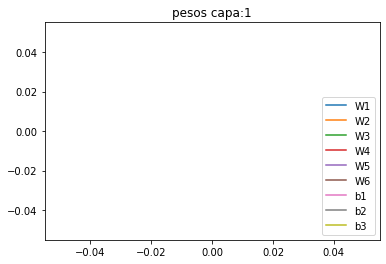

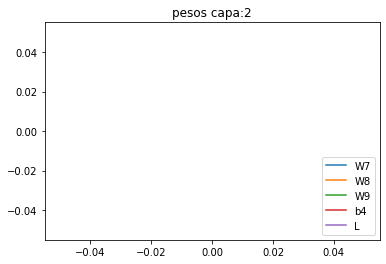

In [ ]:
#@title Grafica de movimiento de pesos en proceso ajuste
W1 = []
W2 = []
W3 = []
W4 = []
W5 = []
W6 = []
W7 = []
W8 = []
W9 = []
B1 = []
B2 = []
B3 = []
B4 = []
L = []
for i, layer in enumerate(L1):
  #print(layer.W[0][0])
  W1.append(layer.W[0][0])
  W2.append(layer.W[1][0])
  B1.append(layer.b[0][0])

  W3.append(layer.W[0][1])
  W4.append(layer.W[1][1])
  B2.append(layer.b[0][1])

  W5.append(layer.W[0][2])
  W6.append(layer.W[1][2])
  B3.append(layer.b[0][2])

for i, layer in enumerate(L2):
  W7.append(layer.W[0][0])
  W8.append(layer.W[1][0])
  W9.append(layer.W[2][0])
  B4.append(layer.b[0][0])

  L.append(layer.loss)

#W1
plt.title("pesos capa:1")
plt.plot(W1, label='W1')
plt.plot(W2, label='W2')
plt.plot(W3, label='W3')
plt.plot(W4, label='W4')
plt.plot(W5, label='W5')
plt.plot(W6, label='W6')
plt.plot(B1, label='b1')
plt.plot(B2, label='b2')
plt.plot(B3, label='b3')
plt.legend(loc='lower right')
plt.show()

plt.title("pesos capa:2")
plt.plot(W7, label='W7')
plt.plot(W8, label='W8')
plt.plot(W9, label='W9')
plt.plot(B4, label='b4')
plt.plot(L, label='L')
plt.legend(loc='lower right')
plt.show()

#https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#sphx-glr-tutorials-intermediate-legend-guide-py
#plt.legend(loc='lower right')
#plt.legend(handles=[W1, W2, W3, W4], title=["W1", "W2", "W3", "W4"])

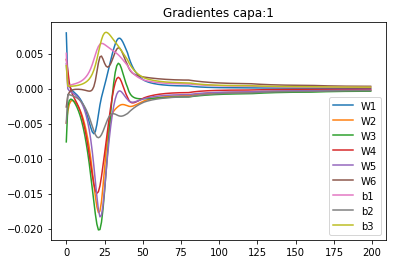

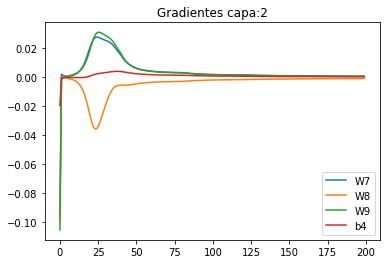

In [ ]:
W1 = []
W2 = []
W3 = []
W4 = []
W5 = []
W6 = []
W7 = []
W8 = []
W9 = []
B1 = []
B2 = []
B3 = []
B4 = []
L = []
for i, layer in enumerate(L1):
  #print(layer.W[0][0])
  W1.append(layer.grad_W[0][0])
  W2.append(layer.grad_W[1][0])
  B1.append(layer.grad_b[0][0])

  W3.append(layer.grad_W[0][1])
  W4.append(layer.grad_W[1][1])
  B2.append(layer.grad_b[0][1])

  W5.append(layer.grad_W[0][2])
  W6.append(layer.grad_W[1][2])
  B3.append(layer.grad_b[0][2])

for i, layer in enumerate(L2):
  W7.append(layer.grad_W[0][0])
  W8.append(layer.grad_W[1][0])
  W9.append(layer.grad_W[2][0])
  B4.append(layer.grad_b[0][0])

  #L.append(layer.dloss)

#W1
plt.title("Gradientes capa:1")
plt.plot(W1, label='W1')
plt.plot(W2, label='W2')
plt.plot(W3, label='W3')
plt.plot(W4, label='W4')
plt.plot(W5, label='W5')
plt.plot(W6, label='W6')
plt.plot(B1, label='b1')
plt.plot(B2, label='b2')
plt.plot(B3, label='b3')
plt.legend(loc='lower right')
plt.show()

plt.title("Gradientes capa:2")
plt.plot(W7, label='W7')
plt.plot(W8, label='W8')
plt.plot(W9, label='W9')
plt.plot(B4, label='b4')
#plt.plot(L, label='L')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#@title ANALISIS RED POR ALTERACION DE CAPAS OPTIMAS
#https://ipywidgets.readthedocs.io/en/latest/index.html
#https://jupyterlite.readthedocs.io/en/latest/
#https://github.com/jupyter-widgets/tutorial
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import Layout, VBox, HBox #  GridBox,
import ipywidgets as widgets
import time
from IPython.display import clear_output

topologia = [p, 3, 1]
red = crea_nn(topologia, sigm)

L1_N1_W1 = widgets.FloatSlider(min=-20, max=20, step=0.01, value=5, continuous_update=False, description='N1 w1') #, layout=Layout(width='70%'), style={'description_width': 'initial'}) #, layout=Layout(flex='1 1 0%', width='30%'), grid_area='N1')
L1_N1_W2 = widgets.FloatSlider(min=-20, max=20, step=0.01, value=5, continuous_update=False, description='N1 w2')#, layout=Layout(width='auto'))  #, layout=Layout(flex='2 3 0%', width='30%'), grid_area='N1')
L1_N1_B  = widgets.FloatSlider(min=-20, max=20, step=0.01, value=5, continuous_update=False, description='N1 b')#, layout=Layout(width='auto'))  #, layout=Layout(flex='1 1 0%', width='30%'), grid_area='N1')
L1_N2_W1 = widgets.FloatSlider(min=-20, max=20, step=0.01, value=5, continuous_update=False, description='N2 w1')#, layout=Layout(width='auto'))  #, layout=Layout(display='inline-flex'))
L1_N2_W2 = widgets.FloatSlider(min=-20, max=20, step=0.01, value=5, continuous_update=False, description='N2 w2')#, layout=Layout(width='100%'))  #, layout=Layout(display='inline-flex'))
L1_N2_B  = widgets.FloatSlider(min=-20, max=20, step=0.01, value=5, continuous_update=False, description='N2 b')#, layout=Layout(width='auto'))  #, layout=Layout(display='inline-flex'))
L1_N3_W1 = widgets.FloatSlider(min=-20, max=20, step=0.01, value=5, continuous_update=False, description='N3 w1')#, layout=Layout(width='auto'))  #, style={'description_width': 'initial'})
L1_N3_W2 = widgets.FloatSlider(min=-20, max=20, step=0.01, value=5, continuous_update=False, description='N3 w2')#, layout=Layout(width='auto'))  #, style={'flex': 'flex-basis'})
L1_N3_B  = widgets.FloatSlider(min=-20, max=20, step=0.01, value=5, continuous_update=False, description='N3 b')#, layout=Layout(width='auto'))  #, style={'flex': 'flex-basis', 'color': 'green'})
L2_N1_W1 = widgets.FloatSlider(min=-20, max=20, step=0.01, value=5, continuous_update=False, description='N4 w1')#, layout=Layout(width='auto')) 
L2_N1_W2 = widgets.FloatSlider(min=-20, max=20, step=0.01, value=5, continuous_update=False, description='N4 w2')#, layout=Layout(width='auto')) 
L2_N1_W3 = widgets.FloatSlider(min=-20, max=20, step=0.01, value=5, continuous_update=False, description='N4 w3')#, layout=Layout(width='auto')) 
L2_N1_B  = widgets.FloatSlider(min=-20, max=20, step=0.01, value=5, continuous_update=False, description='N4 b')#, layout=Layout(width='auto')) 



#                   N1w1          N2w1          N3w1           N1w2          N2w2          N3w2
WL1 = np.array([[ 8.84243203,  2.1386732 ,  2.94748844],   [ 0.78027067,  4.12606739, -4.23355456]])
#WL1 = np.array([[ 1,  2.1386732 ,  2.94748844],   [ 0.78027067,  4.12606739, -4.23355456]])

#                   N1b           N2b         N3b
bL1 = np.array([[ 3.7654632 , -3.25091011, -2.91781571]])
#bL1 = np.array([[ -2 , -3.25091011, -2.91781571]])

#                   N4w1              N4w2            N4w3
WL2 = np.array([[ 14.3519784 ],  [-18.93268329],  [-17.98428509]])
#WL2 = np.array([[ 3.3519784 ],  [-18.93268329],  [-17.98428509]])

#                     N4b
bL2 = np.array([[-2.53003652]])
#bL2 = np.array([[0.53003652]])



L1_N1_W1.value = WL1[0][0]
L1_N1_W2.value = WL1[1][0]
L1_N1_B.value  = bL1[0][0]

L1_N2_W1.value = WL1[0][1]
L1_N2_W2.value = WL1[1][1]
L1_N2_B.value  = bL1[0][1]

L1_N3_W1.value = WL1[0][2]
L1_N3_W2.value = WL1[1][2]
L1_N3_B.value  = bL1[0][2]

L2_N1_W1.value = WL2[0][0]
L2_N1_W2.value = WL2[1][0]
L2_N1_W3.value = WL2[2][0]
L2_N1_B.value  = bL2[0][0]

"""
#                   Layer W  N
L1_N1_W1.value = red[0].W[0][0]  #WL1[0][0]
L1_N1_W2.value = red[0].W[1][0]  #WL1[1][0]
L1_N1_B.value  = red[0].b[0][0]  #bL1[0][0]

L1_N2_W1.value = red[0].W[0][1]  #WL1[0][1]
L1_N2_W2.value = red[0].W[1][1]  #WL1[1][1]
L1_N2_B.value  = red[0].b[0][1]  #bL1[0][1]

L1_N3_W1.value = red[0].W[0][2]  #WL1[0][2]
L1_N3_W2.value = red[0].W[1][2]  #WL1[1][2]
L1_N3_B.value  = red[0].b[0][2]  #bL1[0][2]

L2_N1_W1.value = red[1].W[0][0]  #WL2[0][0]
L2_N1_W2.value = red[1].W[1][0]  #WL2[1][0]
L2_N1_W3.value = red[1].W[2][0]  #WL2[2][0]
L2_N1_B.value  = red[1].b[0][0]  #bL2[0][0]
"""


_x0 = None
_y0 = None
_X = np.array([[None, None]])

def update_plot(N1w1,N1w2,N1b,N2w1,N2w2,N2b,N3w1,N3w2,N3b,N4w1,N4w2,N4w3,N4b):
  global red
  red[0].W = np.array([[N1w1, N2w1, N3w1], [N1w2, N2w2, N3w2]])
  red[0].b = np.array([[N1b, N2b, N3b]])
  red[1].W = np.array([[N4w1], [N4w2], [N4w3]])
  red[1].b = np.array([[N4b]])
  print(red[0].W, red[0].b, red[1].W, red[1].b)

  #EVAL
  res = 50
  global _x0
  _x0 = np.linspace(-1.5, 1.5, res)
  global _x1
  _x1 = np.linspace(-1.55, 1.45, res)
  _Y = np.zeros((res, res))

  clear_output(wait=True)

  #global _X
  #_X = np.array([[None, None]])
  #_Y = [[None]]

  for i0, x0 in enumerate(_x0):
    for i1, x1 in enumerate(_x1):
      #_X[0].append([x0, x1])
      #_Y[0].append([x0])
      _Y[i0, i1] = train(red, np.array([[x0, x1]]), Y_class, l2_cost, train=False)[0,0]   # verificacion
      #print(f"[{x0}, {x1}] = {_Y[i0, i1]}")
  #print(len(_X[0]), _X.shape[0])


  # PREPARA GRAFICOS
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

  # IMPRIME MATRICES
  for l, Nlayer in enumerate(red):
    layer = np.concatenate((Nlayer.W, Nlayer.b), axis=0)

    ax[l].set_title(f'W & b capa:{l}')
    #pone numeros
    for a in range(layer.shape[0]): #layer.W.shape[0]):
      last = layer.shape[0]-1
      for b in range(layer.shape[1]): #layer.W.shape[1]):
        #ha: 'center', 'right', 'left'
        #va: 'top', 'bottom', 'center', 'baseline', 'center_baseline'
          ax[l].text(a, b, '{:.2f}'.format(layer[a, b]), ha='center', va='bottom', color='red')
          ww = "b"
          if a<last : ww = f"w{a+1}"
          ax[l].text(a, b, f'N{b+1} {ww}', ha='left', va='top', color='green')

    #imprime    
    #ax.matshow(layer.W)
    ax[l].imshow(layer.T, cmap='bone') # cmap='gray'   cmap='binary'  cmap='hot'

    #limpia
    for a in range(layer.shape[0]):
      for b in range(layer.shape[1]):
          ax[l].text(a, b, '')


  # IMPRIME GRAFICO 
  ax[2].set_title(f'EVAL samples:{res}')
  ax[2].pcolormesh(_x0, _x1, _Y, cmap="coolwarm")           # imprime la malla de resultados de la verificacion
  ax[2].axis("equal")
  ax[2].scatter(X_coord[:,0], X_coord[:,1], c=Y_class)      # imprime los puntos

  plt.show()

#interact(update_plot, N1w1=L1_N1_W1, N1w2=L1_N1_W2, N1b=L1_N1_B, N2w1=L1_N2_W1, N2w2=L1_N2_W2, N2b=L1_N2_B, N3w1=L1_N3_W1, N3w2=L1_N3_W2, N3b=L1_N3_B, N4w1=L2_N1_W1, N4w2=L2_N1_W2, N4w3=L2_N1_W3, N4b=L2_N1_B)

N1_box = widgets.VBox([L1_N1_W1, L1_N1_W2, L1_N1_B ])
N2_box = widgets.VBox([L1_N2_W1, L1_N2_W2, L1_N2_B ])
N3_box = widgets.VBox([L1_N3_W1, L1_N3_W2, L1_N3_B ])
N4_box = widgets.VBox([L2_N1_W1, L2_N1_W2, L2_N1_W3, L2_N1_B])

user_interface = widgets.HBox([N1_box, N2_box, N3_box, N4_box])
out = widgets.interactive_output(update_plot, {'N1w1':L1_N1_W1, 'N1w2':L1_N1_W2, 'N1b':L1_N1_B, 'N2w1':L1_N2_W1, 'N2w2':L1_N2_W2, 'N2b':L1_N2_B, 'N3w1':L1_N3_W1, 'N3w2':L1_N3_W2, 'N3b':L1_N3_B, 'N4w1':L2_N1_W1, 'N4w2':L2_N1_W2, 'N4w3':L2_N1_W3, 'N4b':L2_N1_B})
display(user_interface, out)


Output()

In [ ]:
red[0].snapshot()
red[1].snapshot()

In [ ]:
red[0].rollback()
red[1].rollback()

In [ ]:
red[0].W = red[0].W_i.copy()
red[1].W = red[1].W_i.copy()


In [ ]:
_X

array([[None, None]], dtype=object)

In [ ]:
_x0, _x1,  np.linspace(-1.55, 1.45, 10)

(array([-1.5       , -1.16666667, -0.83333333, -0.5       , -0.16666667,
         0.16666667,  0.5       ,  0.83333333,  1.16666667,  1.5       ]),
 array([-1.5       , -1.16666667, -0.83333333, -0.5       , -0.16666667,
         0.16666667,  0.5       ,  0.83333333,  1.16666667,  1.5       ]),
 array([-1.55      , -1.21666667, -0.88333333, -0.55      , -0.21666667,
         0.11666667,  0.45      ,  0.78333333,  1.11666667,  1.45      ]))

In [ ]:
%whos

Variable          Type                Data/Info
-----------------------------------------------
L1_N1_B           FloatSlider         FloatSlider(value=3.76546<...>.0, min=-20.0, step=0.01)
L1_N1_W1          FloatSlider         FloatSlider(value=8.84243<...>.0, min=-20.0, step=0.01)
L1_N1_W2          FloatSlider         FloatSlider(value=0.78027<...>.0, min=-20.0, step=0.01)
L1_N2_B           FloatSlider         FloatSlider(value=-3.2509<...>.0, min=-20.0, step=0.01)
L1_N2_W1          FloatSlider         FloatSlider(value=2.13867<...>.0, min=-20.0, step=0.01)
L1_N2_W2          FloatSlider         FloatSlider(value=4.12606<...>.0, min=-20.0, step=0.01)
L1_N3_B           FloatSlider         FloatSlider(value=-3.29, <...>.0, min=-20.0, step=0.01)
L1_N3_W1          FloatSlider         FloatSlider(value=2.94748<...>.0, min=-20.0, step=0.01)
L1_N3_W2          FloatSlider         FloatSlider(value=-3.8, c<...>.0, min=-20.0, step=0.01)
L2_N1_B           FloatSlider         FloatSlider(value=-2

In [ ]:
#@title
a = widgets.IntSlider()
b = widgets.IntSlider()
c = widgets.IntSlider()
ui = widgets.HBox([a, b, c])
def f(a, b, c):
    print((a, b, c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})
#out = widgets.interactive(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

Output()

In [ ]:
#https://ipywidgets.readthedocs.io/en/latest/index.html
#https://jupyterlite.readthedocs.io/en/latest/
#https://github.com/jupyter-widgets/tutorial
#https://www.programcreek.com/python/example/90674/ipywidgets.IntSlider
#https://www.programcreek.com/python/?code=scqubits%2Fscqubits%2Fscqubits-master%2Fscqubits%2Fcore%2Fexplorer.py

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

x_widget = widgets.FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = widgets.FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value

y_widget.observe(update_x_range, 'value')

def printer(x, y):
    print(x, y)

interact(printer,x=x_widget, y=y_widget);


interactive(children=(FloatSlider(value=0.0, description='x', max=10.0, step=0.05), FloatSlider(value=5.0, des…

In [ ]:
#@title proceso de entrenamiento y test con video
import time
from IPython.display import clear_output

random.seed(777)
topologia = [p, 4, 8, 1]
#red = crea_nn(topologia, sigm)

#print(red.shape)
red = []
red.append(capa_neuronal(2, 4, sigm, 5))
red.append(capa_neuronal(4, 8, sigm, 3))
red.append(capa_neuronal(8, 1, sigm, 10))

loss = []
frames = []

for i in range(2000):
  Py = train(red, X_coord, Y_class, l2_cost, 0.5)     # entrenamiento

  if i%25 ==0:
    loss.append(l2_cost[0](Py, Y_class))      # LOSS del entrenamiento

    res = 50
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)
    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(red, np.array([[x0, x1]]), Y_class, l2_cost, train=False)[0,0]   # verificacion

    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    #fig, ax = plt.subplots()
    for l, Nlayer in enumerate(red):
      #layer = Nlayer.W.copy()
      #layer[0].append(Nlayer[0].b)
      layer = np.concatenate((Nlayer.W, Nlayer.b), axis=0)

      ax[0,l].set_title(f'W & b capa:{l}')
      #pone numeros
      for a in range(layer.shape[0]): #layer.W.shape[0]):
        for b in range(layer.shape[1]): #layer.W.shape[1]):
            ax[0,l].text(a, b, '{:.2f}'.format(layer[a, b]), ha='center', va='center', color='red')

      #imprime    
      #ax.matshow(layer.W)
      ax[0,l].imshow(layer.T, cmap='bone') # cmap='gray'   cmap='binary'  cmap='hot'
      #ax[1,l].imshow(layer.b, cmap='bone') # cmap='gray'   cmap='binary'  cmap='hot'

      #limpia
      for a in range(layer.shape[0]):
        for b in range(layer.shape[1]):
            ax[0,l].text(a, b, '')

    #plt.show()

    """
    #for l, layer in enumerate(red):
      #plt.matshow(layer.W)
    plt.show()
    """

    ax[1,0].set_title(f'EVAL iter:{i}')
    ax[1,0].pcolormesh(_x0, _x1, _Y, cmap="coolwarm")           # imprime la malla de resultados de la verificacion
    ax[1,0].axis("equal")

    #plt.scatter(X_coord[:,0], X_coord[:,1], c=Y_class)
    ax[1,0].scatter(X_coord[:,0], X_coord[:,1], c=Y_class)      # imprime los puntos

    clear_output(wait=True)
    #plt.show()
    ax[1,2].set_title(f'LOSS {loss[-1]} iter:{i}')
    ax[1,2].plot(range(len(loss)), loss)                        # imprime el loss
    #plt.show()

    # FRAMES PARA VIDEO
    figu = plt.gcf()
    figu.canvas.draw()
    image = np.frombuffer(figu.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(figu.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)

    plt.show()

    #time.sleep(1)

# Muestra el video
#media.show_video(frames, fps=3)

In [ ]:
relu[0](-3)

0

In [ ]:
red[0].W

array([[ 1.90401014,  4.62566913, -1.09476949, -2.50862738],
       [ 3.57917139,  0.24109113, -3.02505216, -1.62772436]])

In [ ]:
vars(red[0])

{'n_entrada': 2,
 'n_salidas': 4,
 'func_activacion': <function __main__.<lambda>(x)>,
 'deriv_activacion': <function __main__.<lambda>(x)>,
 'b': array([[0., 0., 0., 0.]]),
 'W': array([[ 1.90401014,  4.62566913, -1.09476949, -2.50862738],
        [ 3.57917139,  0.24109113, -3.02505216, -1.62772436]]),
 'W_': [],
 'X': [],
 'neurona': [],
 'activa': [],
 'dactiva': [],
 'loss': [],
 'dloss': [],
 'dloss_back': [],
 'delta': [],
 'grad_W': [],
 'grad_b': []}

In [ ]:
#@title  librerias Graphics and plotting.
print('Installing mediapy:')
!command -v ffmpeg >/dev/null || (apt update && apt install -y ffmpeg)
!pip install -q mediapy
import mediapy as media

Installing mediapy:
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.4 MB/s eta 0:00:00


In [ ]:
#@title desplegar video
import mediapy as media
# Muestra el video
media.show_video(frames, fps=3)

In [ ]:
#@title
layer

array([[-0.11878377, -0.6561763 , -0.6834172 , -0.68873911],
       [ 0.66061351,  0.51964402, -0.33897284,  0.96597544],
       [ 0.03074625, -0.23378311, -0.23948108,  0.2084533 ]])

In [ ]:
#@title
Nlayer.b

array([[ 0.03074625, -0.23378311, -0.23948108,  0.2084533 ]])

In [ ]:
#@title
for l, layer in enumerate(red):
  print (layer.W)

[[ 0.91443482 -0.68711245  0.07775442 -0.79371103]
 [ 0.20993999  0.57737834  0.83419131 -0.55221335]]
[[ 0.91911512  0.47607804 -0.78071436  0.44327654 -0.33286943  0.43298399
  -0.49094377  0.37441063]
 [ 0.7678828  -0.36255103 -0.49552923 -0.36897207  0.78443632 -0.90628354
   0.46420499  0.19469626]
 [-0.33180546 -0.81417344  0.37296148  0.382687    0.84906836 -0.81347008
   0.60625856  0.76019638]
 [ 0.4888658   0.26222229 -0.46360502  0.82703822 -0.02636784  0.40843201
  -0.80913799 -0.75944577]]
[[-0.15976072]
 [-0.91068376]
 [-0.2597261 ]
 [-0.62038373]
 [-0.72917268]
 [-0.79408732]
 [-0.0628835 ]
 [-0.82925229]]


In [ ]:
#@title PRUEBA MULTIPLICACION MATRIS Y MULTIPLICACION VALORES
import numpy as np

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.array([[9, 10], [11, 12]])

D = A @ B * C
print("R1:", D)

D = A @ B 
print(D)

D = D * C
print("R2:", D)

D = B * C
print(D)

D = A @ D
print("R3:", D)

D = A.dot(B * C)
print("R4:", D)

D = A.dot(B)
print( D)

D = D * C
print("R5:", D)


R1: [[171 220]
 [473 600]]
[[19 22]
 [43 50]]
R2: [[171 220]
 [473 600]]
[[45 60]
 [77 96]]
R3: [[199 252]
 [443 564]]
R4: [[199 252]
 [443 564]]
[[19 22]
 [43 50]]
R5: [[171 220]
 [473 600]]


Este ejemplo implementa una red neuronal de dos capas con una función de activación sigmoide en cada capa. La regla de la cadena se utiliza para calcular los gradientes de la función de pérdida con respecto a los pesos y sesgos. Finalmente, los pesos y sesgos se actualizan utilizando el descenso de gradiente.


La gradiente es el vector de derivadas parciales de la función de pérdida con respecto a cada peso y sesgo en la red neuronal. Se puede calcular utilizando diferentes técnicas, como la regla de la cadena.

La regla de la cadena es un método para calcular el gradiente de una función compuesta, es decir, una función que depende de otras funciones. En el caso del backpropagation, la función de pérdida es una función compuesta de las funciones de activación de las capas de la red neuronal.

Aquí está un ejemplo de cómo calcular la gradiente de la función de pérdida con respecto a los pesos y sesgos de una capa utilizando la regla de la cadena:

Calcular la salida de la capa actual utilizando la función de activación y los pesos y sesgos actuales.

Calcular el gradiente de la función de pérdida con respecto a la salida de la capa actual. Este gradiente se conoce como el gradiente "delta".

Propagar el gradiente delta hacia atrás a través de la capa anterior utilizando la matriz transpuesta de los pesos de la capa actual.

Calcular el gradiente de la función de pérdida con respecto a los pesos de la capa actual utilizando la entrada a la capa actual. Este gradiente se puede calcular como el producto punto entre el gradiente delta y la entrada a la capa actual.

Calcular el gradiente de la función de pérdida con respecto al sesgo de la capa actual utilizando el gradiente delta.

Repetir los pasos 3 a 5 para cada capa de la red neuronal hasta llegar a la capa de entrada.

Una vez que se han calculado los gradientes con respecto a todos los pesos y sesgos, se pueden utilizar para actualizar los pesos y sesgos utilizando un algoritmo de optimización, como el descenso de gradiente estocástico o Adam.






In [ ]:
#@title PRUEBA RED BASICA NEURONAL
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Datos de entrada
inputs = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])
outputs = np.array([[0],[1],[1],[0]])

# Inicializar pesos aleatoriamente
weights_0_1 = 2 * np.random.random((3, 4)) - 1
weights_1_2 = 2 * np.random.random((4, 1)) - 1

# Entrenamiento
for iteration in range(10000):

    # Pasada hacia adelante
    layer_0 = inputs
    layer_1 = sigmoid(np.dot(layer_0, weights_0_1))
    layer_2 = sigmoid(np.dot(layer_1, weights_1_2))

    # Cálculo de la pérdida
    layer_2_error = outputs - layer_2
    layer_2_delta = layer_2_error * sigmoid_derivative(layer_2)

    # Backpropagation
    layer_1_error = layer_2_delta.dot(weights_1_2.T)
    layer_1_delta = layer_1_error * sigmoid_derivative(layer_1)

    weights_1_2 += layer_1.T.dot(layer_2_delta)
    weights_0_1 += layer_0.T.dot(layer_1_delta)

# Resultados finales
print("Salida después del entrenamiento:")
print(layer_2)


Salida después del entrenamiento:
[[0.01053463]
 [0.98987782]
 [0.98981285]
 [0.00993244]]


In [ ]:
#@title
weights_1_2, weights_0_1

(array([[-11.87243918],
        [  4.97385893],
        [ -7.81853413],
        [  2.02123815]]),
 array([[-6.62370136, -2.79553102,  3.97926259, -1.197868  ],
        [-6.62083843, -2.85044338,  3.99525479, -1.07274047],
        [ 2.83697788,  4.51791006, -6.22097687,  1.94320615]]))

In [ ]:
#@title test base
    layer_0 = np.array([1,1,0])
    layer_1 = sigmoid(np.dot(layer_0, weights_0_1))
    layer_2 = sigmoid(np.dot(layer_1, weights_1_2))
    layer_2

array([0.00049562])

#DESDE ACA SERA CON PYTORCH

In [114]:
# torch
import torch 
import torch.nn as nn
#import torch.nn.functional as F
import torch.optim as optim

class red_neuronal(nn.Module):
    def __init__(self):
        super(red_neuronal, self).__init__()
        self.l1 = nn.Linear(2, 3)
        self.l2 = nn.Linear(3, 1)

    def forward(self, x):
        #print("AK", x)
        x = torch.sigmoid(self.l1(x))
        x = torch.sigmoid(self.l2(x))
        return x



In [109]:
import numpy as np

# Procedimiento de entrenamiento del modelo
def train(net, X, Y, optimizer, criterion, lr, epochs=60, scheduler=None): # vamos a partir sin scheduler
    total_loss = []
    net.train()
    for epoch in range(epochs):  # loops sobre el dataset de entrenamiento multiples veces 

            running_loss = []
            #for i, data in enumerate(trainloader, 0): # aqui empiezan las iteraciones

            # obtener los inputs en forma de lista de [inputs, labels]
            #inputs, labels = data
            inputs = torch.FloatTensor(X)
            labels =  torch.FloatTensor(Y)
            # cada vez que recibimos un batch, lo enviamos a GPU
            #inputs = inputs.to(device)
            #labels = labels.to(device)

            # forward + backward + optimizacion
            outputs = net(inputs)
            # aqui se calcula la funcion de perdida entre output y ground truth
            loss = criterion(outputs, labels)
            # aqui es donde actualizamos los gradientes del modelo
            # a cada uno de los pesos asosicados, les encuentra la pendiente y luego el gradiente
            loss.backward()
            # toma los gradientes de los pesos, y los optimiza
            optimizer.step()

            # inicializa gradientes en zero
            optimizer.zero_grad() # si no reiniciamos, se van a sumar y acumular lo gradientes!!

            # guardar estadisticas 
            running_loss.append(loss.item())
            print(f"epoch {epoch} Loss", loss.item())


    print('Finished Training of {}'.format(lr))
    return total_loss


In [113]:
red2 = red_neuronal()#.to("cpu")
#optimizer = torch.optim.SGD( red2.parameters(), lr = 0.6 ) # Learning rate equal to 0.01
optimizer = torch.optim.Adam( red2.parameters(), lr = 0.6 ) # Learning rate equal to 0.01
mse_loss = nn.MSELoss()
#optimizer = optim.SGD(lr = 0.01 ) # Learning rate equal to 0.01
#train(red2, X_coord, Y_class, optimizer, mse_loss, lr, epochs=60, scheduler=None)

train(red2, X_coord, Y_class, optimizer, mse_loss, lr=0.6, epochs=2000, scheduler=None) 


epoch 0 Loss 0.2538363039493561
epoch 1 Loss 0.33717137575149536
epoch 2 Loss 0.26964735984802246
epoch 3 Loss 0.2532190680503845
epoch 4 Loss 0.27234140038490295
epoch 5 Loss 0.2734867036342621
epoch 6 Loss 0.2617596983909607
epoch 7 Loss 0.25186628103256226
epoch 8 Loss 0.2504577338695526
epoch 9 Loss 0.25458526611328125
epoch 10 Loss 0.2585490345954895
epoch 11 Loss 0.2590841054916382
epoch 12 Loss 0.2563959062099457
epoch 13 Loss 0.2527008652687073
epoch 14 Loss 0.25044354796409607
epoch 15 Loss 0.25071394443511963
epoch 16 Loss 0.25261086225509644
epoch 17 Loss 0.2542323172092438
epoch 18 Loss 0.2543002665042877
epoch 19 Loss 0.2528901994228363
epoch 20 Loss 0.2510775029659271
epoch 21 Loss 0.25006183981895447
epoch 22 Loss 0.2503170371055603
epoch 23 Loss 0.25132501125335693
epoch 24 Loss 0.2521095275878906
epoch 25 Loss 0.2520473599433899
epoch 26 Loss 0.2512529492378235
epoch 27 Loss 0.2503644824028015
epoch 28 Loss 0.2499994933605194
epoch 29 Loss 0.2502899765968323
epoch 30 L

[]

In [86]:
red2.parameters()

<generator object Module.parameters at 0x7f338dd25430>

#DESDE AQUI ES TENSORFLOW

In [32]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [49]:
my_layer_1 = keras.layers.Dense(units=3, input_shape=[2])
my_layer_2 = keras.layers.Dense(units=1)
model = tf.keras.Sequential([my_layer_1, my_layer_2])
model.compile(optimizer='sgd', loss='mean_squared_error')

#xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
#ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(X_coord, Y_class, epochs=2000 )

Epoch 1/3000
1/1 [==============================] - 1s 513ms/step - loss: 0.5446
Epoch 2/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.5325
Epoch 3/3000
1/1 [==============================] - 0s 13ms/step - loss: 0.5209
Epoch 4/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.5099
Epoch 5/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.4993
Epoch 6/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.4892
Epoch 7/3000
1/1 [==============================] - 0s 14ms/step - loss: 0.4796
Epoch 8/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.4703
Epoch 9/3000
1/1 [==============================] - 0s 13ms/step - loss: 0.4615
Epoch 10/3000
1/1 [==============================] - 0s 14ms/step - loss: 0.4531
Epoch 11/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.4450
Epoch 12/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.4373
Epoch 13/3000
1/1 [===================

KeyboardInterrupt: ignored

In [46]:
print(model.predict(X_coord))

1/1 [==============================] - 0s 74ms/step
[[0.48359087]
 [0.49098542]
 [0.49288586]
 [0.48363304]
 [0.49785858]
 [0.5324433 ]
 [0.5255029 ]
 [0.5135744 ]
 [0.46239877]
 [0.5163436 ]]


In [47]:
print(my_layer_1.get_weights())
print(my_layer_2.get_weights())

[array([[ 0.41887543, -0.2916772 , -0.27271292],
       [ 0.42315558, -0.01898563, -0.48422614]], dtype=float32), array([0.12755628, 0.16682954, 0.15599163], dtype=float32)]
[array([[0.62171215],
       [0.53864604],
       [0.51112664]], dtype=float32), array([0.2508537], dtype=float32)]


#DESDE AQUI ES KERAS

In [54]:
#https://www.aprendemachinelearning.com/una-sencilla-red-neuronal-en-python-con-keras-y-tensorflow/
from keras.models import Sequential
from keras.layers.core import Dense
from keras import optimizers
# parametros de metodo de optimizacion
sgd = optimizers.SGD(lr=0.5, decay=1e-6, momentum=0.9, nesterov=True)

# parametros del procedimiento de aprendizaje (incluye que optimizador usar)
#other_model.compile(loss='mean_squared_error',  optimizer=sgd)

model = Sequential()
model.add(Dense(3, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
 
#              optimizer='adam',
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['binary_accuracy'])
 
model.fit(X_coord, Y_class, epochs=1000)


# evaluamos el modelo
scores = model.evaluate(X_coord, Y_class)
 
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(X_coord).round())


Epoch 1/1000
1/1 [==============================] - 0s 377ms/step - loss: 0.2598 - binary_accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.2563 - binary_accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2531 - binary_accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2511 - binary_accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2503 - binary_accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2506 - binary_accuracy: 0.4000
Epoch 7/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.2512 - binary_accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2517 - binary_accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.2518 - binary_accuracy: 0.5000
Epoch 10/1000
1/1 [==========================

In [52]:
Y_class

array([[0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1]])